In [11]:
import os
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import sklearn.decomposition
import mdtraj
import random 
from ensemble_analysis_lib import *
from  plot import *
from functions import *

# N-terminal SH3 domain of Drk protein

The N-terminal Src homology 3 (SH3) domain of the Drk protein, also known as the Downstream of receptor kinase (Drk), is a crucial protein-protein interaction domain found in many signaling proteins. It plays a vital role in mediating various cellular processes, including signal transduction, cell proliferation, differentiation, and apoptosis.

The ensembles are: SH3-1 (PED00156, 100 confs.),SH3-2 (PED00157, 100 conf.) and SH3-3 (PED00158, with 88 
conf.), therefore in total we have 288 conformations.

## LOAD PDB FILES
This code is designed to analyze ensembles of molecular structures obtained from PDB files. These files serve as repositories of structural data, providing detailed information about the three-dimensional coordinates of atoms within the molecular structures.

## FEATURIZATION
The featurization variable offers a selection of different methods to extract relevant features from the molecular ensembles. For instance, "ca_dist" computes distances between alpha carbon (CA) atoms, "phi_psi" extracts backbone torsion angles (phi and psi), 'sc_center_of_mass_dist'computes distances between side chain center of mass, while "a_angle" computes alpha angles.

### Alpha carbon
We will focus on extracting alpha carbon atoms from PDB files. Alpha carbon atoms are those carbon atoms directly bonded to a nitrogen atom of the amino acid. They are essential for understanding protein structure as they are part of the backbone of amino acids. They serve as fundamental reference points for the overall architecture of the protein.

Extract your desired feature from the ensembles' trajcetories

- featurization is the selected feature (in this case ca_dist)
- featurization_params is the parameters related to each selected feature 


In [12]:
# Codes of the ensembles we want to analyze,corresponding PDB files.
ens_codes = ['PED00156','PED00157','PED00158']
  
# Directory with the PDB files.
pdb_dp = "/Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3"

# Featurization options.
featurization = "ca_dist"  # choices: "ca_dist", phi_psi,sc_center_of_mass_dist 
featurization_params = {"ca_dist": {"seq_sep": 2, "normalize": True},
                        "phi_psi": {},
                        "a_angle": {}}


In [13]:
pipeline = EnsembleAnalysis(pdb_dp=pdb_dp,
                            ens_codes=ens_codes)

# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3/PED00156.dcd.
- Found 100 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3/PED00157.dcd.
- Found 100 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3/PED00158.dcd.
- Found 88 conformations.


In [14]:
pipeline.featurize(featurization=featurization,
                   featurization_params=featurization_params[featurization])

# Featurizing the PED00156 ensemble.
- Featurized ensemble shape: (100, 1653)
# Featurizing the PED00157 ensemble.
- Featurized ensemble shape: (100, 1653)
# Featurizing the PED00158 ensemble.
- Featurized ensemble shape: (88, 1653)
Concatenated featurized ensemble shape: (288, 1653)


#### Trajectories
 To analyze the molecular ensembles provided in the dictionary, we extract information about the carbon alpha (CA) atoms. These atoms are vital in understanding the structure and dynamics of proteins. By considering the distances between CA atoms and their three-dimensional coordinates, we gain insights into the spatial arrangement and conformational changes of the protein molecules.

Understanding the spatial arrangement of CA atoms is crucial in studying protein folding, stability, and interactions. Changes in distances between CA atoms can indicate structural transitions, such as folding or unfolding, which are essential for understanding protein function. 

In [15]:
trajectories= pipeline.trajectories
trajectories

{'PED00156': <mdtraj.Trajectory with 100 frames, 941 atoms, 59 residues, without unitcells at 0x12bf798e0>,
 'PED00157': <mdtraj.Trajectory with 100 frames, 939 atoms, 59 residues, without unitcells at 0x12b973110>,
 'PED00158': <mdtraj.Trajectory with 88 frames, 939 atoms, 59 residues, without unitcells at 0x12c050b90>}

In [16]:
ca_xyz_dict=dict_coord(trajectories)

### Distance matrix
##### Proteins are dynamic molecules that undergo various structural changes essential for their biological activities, such as folding, binding to other molecules, and catalyzing biochemical reactions. These structural changes often involve alterations in the distances between atoms within the protein structure. By calculating distance matrices, we obtain information about the spatial relationships between different regions of the protein and how they change over time or in response to external stimuli.

The get_distance_matrix_dict function represents a fundamental tool in structural biology. It operates by calculating distance matrices for each protein in the dictionary using the provided XYZ coordinates and returns a new dictionary where the keys correspond to the protein identifiers and the values are their respective distance matrices. By calculating distance matrices from XYZ coordinates, this function allows us to quantify the distances between carbon atoms in the complex, providing an important perspective for understanding the spatial relationships within protein structures.

In [17]:
distance_matrix_dict=calculate_distance_matrix_dict(ca_xyz_dict)

#### Distance maps comparison
The comparison of distance maps is crucial for assessing structural similarities and variations among protein conformations obtained from simulations or experiments. This enables us to understand molecular interaction mechanisms and study protein dynamics in various biological contexts. 

The 'plot_average_dmap_comparison' function compares the average distance maps between a reference set of conformations and a generated ensemble. It produces a plot where pixel intensity represents the average distance between residue pairs. Customization options include font sizes, DPI, and the maximum distance value. 

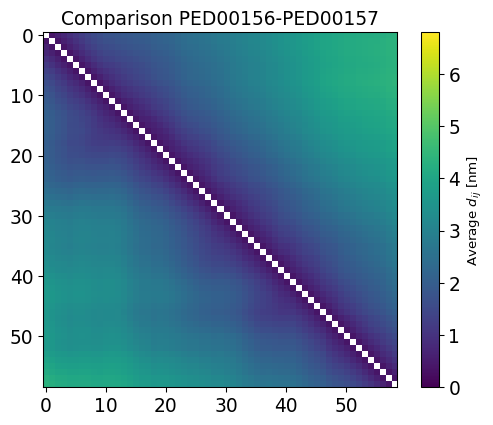

In [18]:
plot_average_dmap_comparison(distance_matrix_dict['PED00156'],distance_matrix_dict['PED00157'],'Comparison PED00156-PED00157')

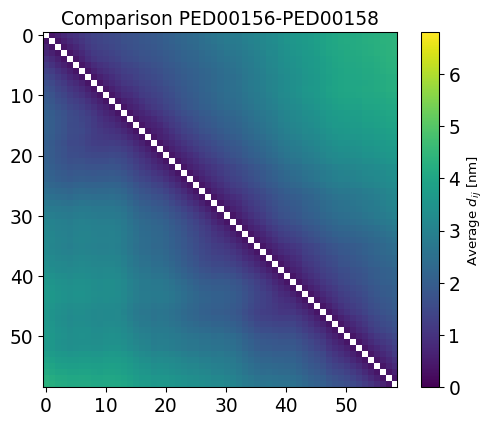

In [19]:
plot_average_dmap_comparison(distance_matrix_dict['PED00156'],distance_matrix_dict['PED00158'],'Comparison PED00156-PED00158')

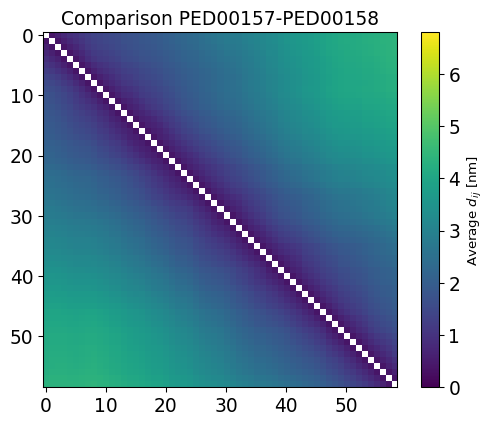

In [20]:
plot_average_dmap_comparison(distance_matrix_dict['PED00157'],distance_matrix_dict['PED00158'],'Comparison PED00157-PED00158')

### Contact map
 A contact map is a graphical representation of the spatial proximity between alpha-carbons. It provides insight into the physical interactions and spatial arrangements within the molecule. Each element in the contact map matrix represents the likelihood of contact between two residues, with values approaching 1 indicating close proximity and values approaching 0 indicating spatial separation.


###### The 'get_contact_map_dict' function generates calculates the contact probability maps from distance maps. It does so by applying a specified threshold to the distance values, considering pairs of residues to be in contact if their distance falls below the threshold. 



In [21]:
contact_map_dict=get_contact_map_dict(distance_matrix_dict)

#### Comparison contact maps
###### One of the common visualizations is representing the contact map as a matrix of colors, where each element represents the probability of contact between two residues. Residues in contact are usually highlighted with different colors, making it easy to identify contact regions in the protein. The main purpose of this representation is to identify significant relationships between protein residues, aiding researchers in better understanding the complexity of its structure and the interactions governing its function.

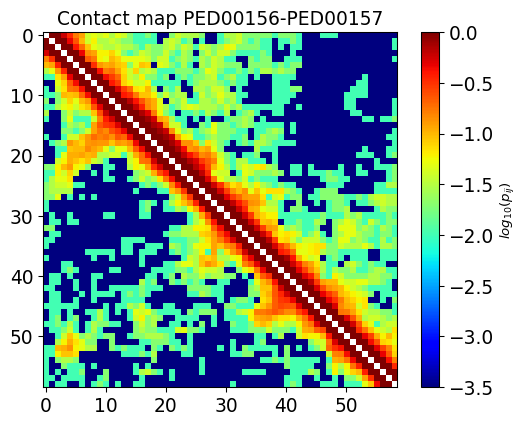

In [22]:
plot_cmap_comparison(contact_map_dict['PED00156'],contact_map_dict['PED00157'],'Contact map PED00156-PED00157')

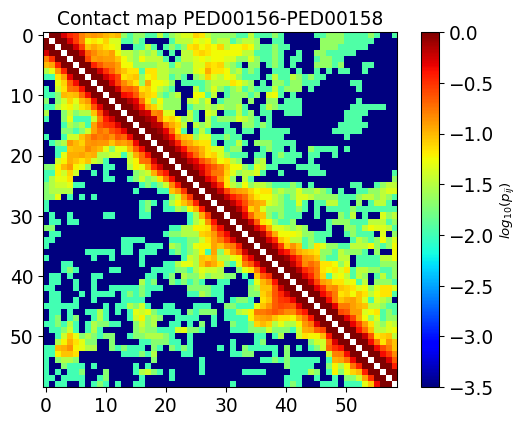

In [23]:
plot_cmap_comparison(contact_map_dict['PED00156'],contact_map_dict['PED00158'],'Contact map PED00156-PED00158',)


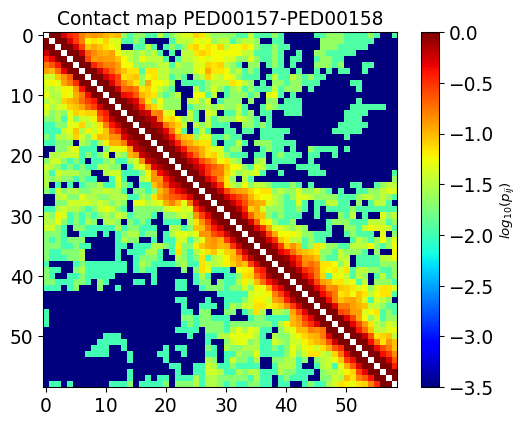

In [24]:
plot_cmap_comparison(contact_map_dict['PED00157'],contact_map_dict['PED00158'],'Contact map PED00157-PED00158',)

#### Distribution
The term "distribution" refers to the pattern or spread of values within a dataset. In the context of protein ensembles, analyzing the distribution of carbon atom positions provides valuable insights into the structural variability of proteins. Graphical representations, such as histograms or box plots, are useful tools for visualizing these distributions as they provide a visual summary of the data, enabling researchers to easily identify central tendencies, dispersion, and the shape of the distribution.

###### The function plot_flattened_data, where each matrix is flattened into a one-dimensional array, is a preprocessing step that facilitates the subsequent graphical representation of these distributions.

In [25]:
flattened_dict=flatten_matrices(distance_matrix_dict)

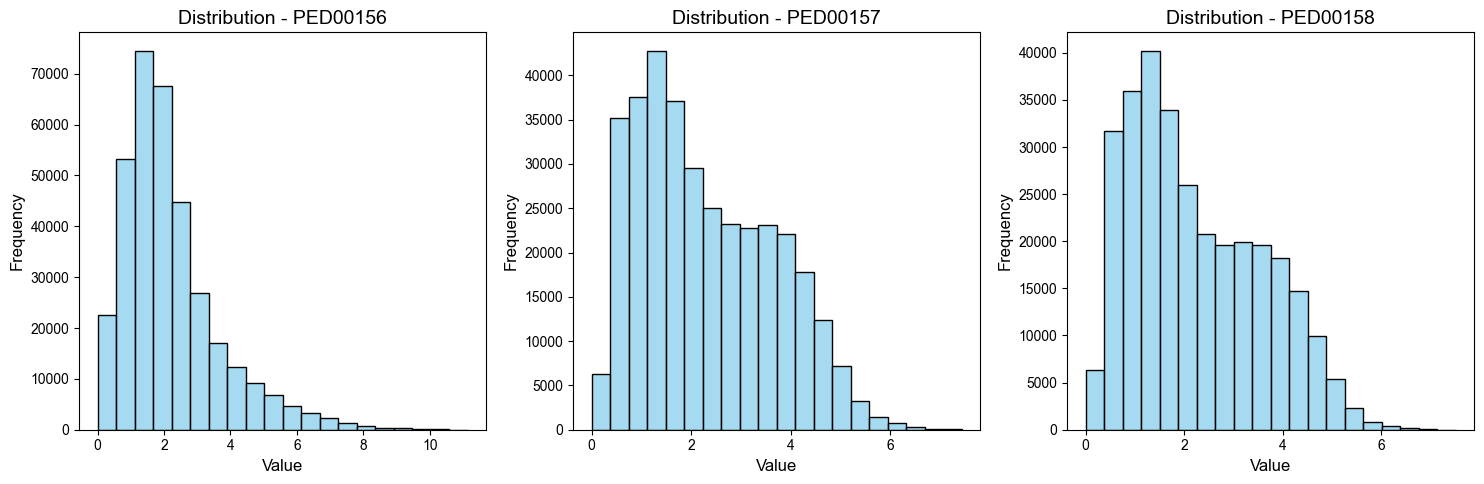

In [26]:
plot_flattened_data(flattened_dict)

###### Comparison with boxplot

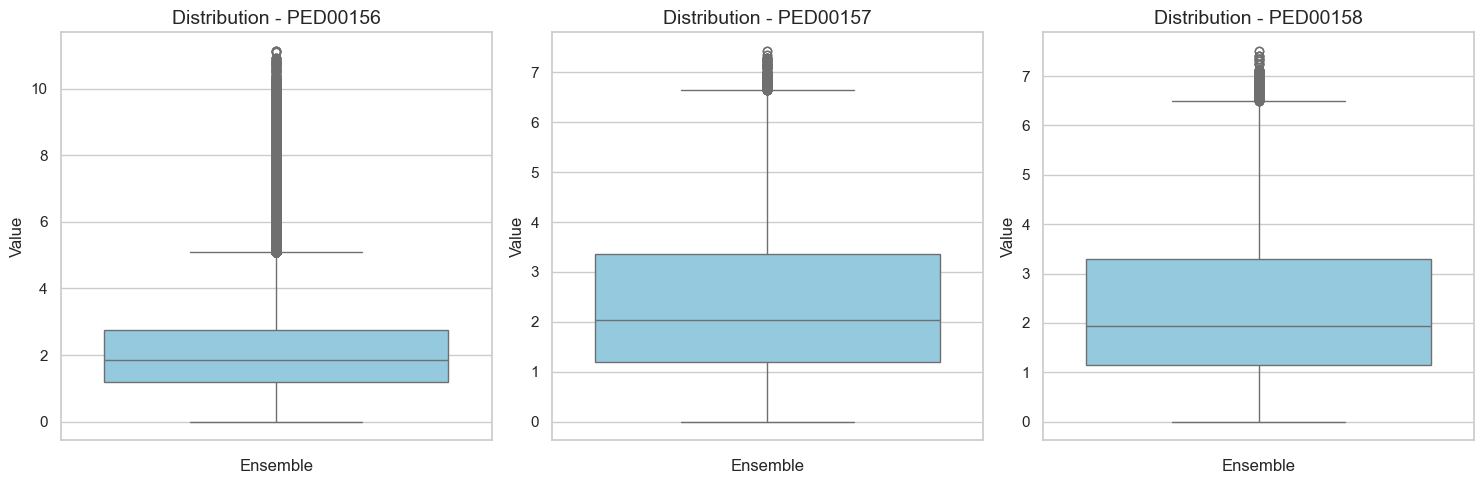

In [27]:
plot_boxplot(flattened_dict)

SH3-1 has a sampling pattern very different from the other ensembles, being mostly composed of more extended and more compact conformations, with only a few conformations from the central portions of the projection. SH3-2 and SH3-3, on the other hand,  suggest a similar sampling.

### Side-chain center of mass
The distances between the side-chain center of mass are a commonly employed measure in the structural analysis of proteins. These distances are computed between the average points of side chains of amino acids within the three-dimensional structure of a protein. The average points are determined by calculating the center of mass of each side chain, which represents the mean position of the atoms composing it. Side chains of amino acids, composed of various functional groups such as methyl, amino, carboxyl, and others specific to amino acids, extend from the main protein structure

In [28]:
# Codes of the ensembles we want to analyze,corresponding PDB files.
ens_codes = ['PED00156','PED00157','PED00158']
  
# Directory with the PDB files.
pdb_dp = "/Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3"

# Featurization options.
featurization = "sc_center_of_mass_dist"  # choices: "ca_dist", phi_psi,sc_center_of_mass_dist 
featurization_params = {"ca_dist": {"seq_sep": 2, "normalize": True},
                        "phi_psi": {},
                        "a_angle": {},
                        "sc_center_of_mass_dist":{}
                        }

In [29]:
traj=pipeline.trajectories
traj

{'PED00156': <mdtraj.Trajectory with 100 frames, 941 atoms, 59 residues, without unitcells at 0x12bf798e0>,
 'PED00157': <mdtraj.Trajectory with 100 frames, 939 atoms, 59 residues, without unitcells at 0x12b973110>,
 'PED00158': <mdtraj.Trajectory with 88 frames, 939 atoms, 59 residues, without unitcells at 0x12c050b90>}

In [30]:
side_center_mass= compute_side_center_mass_dict(traj)

###  Distance matrix
This new matrix considers the distances between the approximate centers of mass of the protein side chains instead of the distances between carbon atoms, providing a representation that takes into account the spatial interactions between the side chains.


In [25]:
distance_matrix_side_center_mass_dict=calculate_distance_matrix_dict(side_center_mass)
distance_matrix_side_center_mass_dict

{'PED00156': array([[[0.        , 0.45516701, 0.8911563 , ..., 1.66276172,
          1.97697359, 2.17767771],
         [0.45516701, 0.        , 0.70799703, ..., 1.90093165,
          2.19023971, 2.28226739],
         [0.8911563 , 0.70799703, 0.        , ..., 1.67646165,
          1.77825852, 1.882101  ],
         ...,
         [1.66276172, 1.90093165, 1.67646165, ..., 0.        ,
          0.68411624, 0.7841143 ],
         [1.97697359, 2.19023971, 1.77825852, ..., 0.68411624,
          0.        , 0.82681171],
         [2.17767771, 2.28226739, 1.882101  , ..., 0.7841143 ,
          0.82681171, 0.        ]],
 
        [[0.        , 0.70866309, 1.00209142, ..., 3.92281869,
          4.36867759, 3.77971574],
         [0.70866309, 0.        , 0.66709625, ..., 3.22695514,
          3.66644746, 3.07264591],
         [1.00209142, 0.66709625, 0.        , ..., 3.2059192 ,
          3.59830376, 3.12977249],
         ...,
         [3.92281869, 3.22695514, 3.2059192 , ..., 0.        ,
          0.

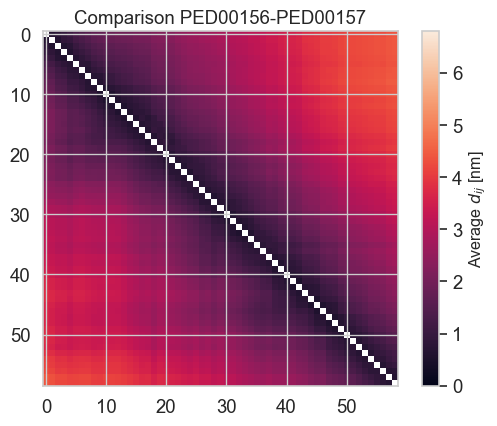

In [26]:
plot_average_dmap_comparison(distance_matrix_side_center_mass_dict['PED00156'],distance_matrix_side_center_mass_dict['PED00157'],'Comparison PED00156-PED00157')

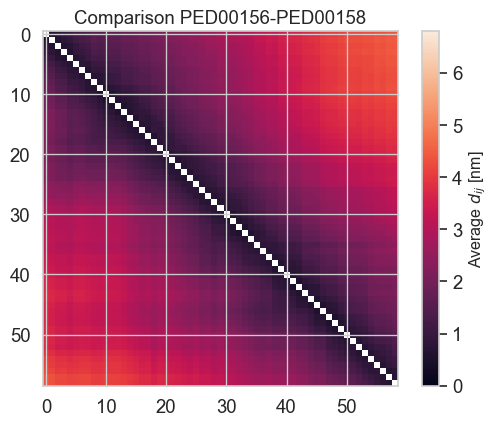

In [27]:
plot_average_dmap_comparison(distance_matrix_side_center_mass_dict['PED00156'],distance_matrix_side_center_mass_dict['PED00158'],'Comparison PED00156-PED00158')

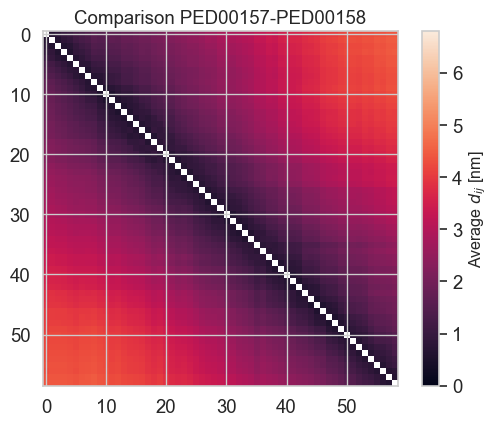

In [28]:
plot_average_dmap_comparison(distance_matrix_side_center_mass_dict['PED00157'],distance_matrix_side_center_mass_dict['PED00158'],'Comparison PED00157-PED00158')

###  Contact map

In [29]:
contact_map_side_chain_dict=get_contact_map_dict(distance_matrix_side_center_mass_dict)
contact_map_side_chain_dict

{'PED00156': array([[1.0001e+00, 9.4010e-01, 3.6010e-01, ..., 2.0100e-02, 1.0100e-02,
         1.0100e-02],
        [9.4010e-01, 1.0001e+00, 1.0001e+00, ..., 1.0000e-04, 1.0100e-02,
         1.0000e-04],
        [3.6010e-01, 1.0001e+00, 1.0001e+00, ..., 1.0100e-02, 1.0100e-02,
         1.0100e-02],
        ...,
        [2.0100e-02, 1.0000e-04, 1.0100e-02, ..., 1.0001e+00, 7.2010e-01,
         5.1010e-01],
        [1.0100e-02, 1.0100e-02, 1.0100e-02, ..., 7.2010e-01, 1.0001e+00,
         8.0010e-01],
        [1.0100e-02, 1.0000e-04, 1.0100e-02, ..., 5.1010e-01, 8.0010e-01,
         1.0001e+00]]),
 'PED00157': array([[1.0001e+00, 9.5010e-01, 5.1010e-01, ..., 1.0000e-04, 1.0000e-04,
         1.0000e-04],
        [9.5010e-01, 1.0001e+00, 1.0001e+00, ..., 1.0000e-04, 1.0000e-04,
         1.0100e-02],
        [5.1010e-01, 1.0001e+00, 1.0001e+00, ..., 1.0000e-04, 1.0000e-04,
         1.0100e-02],
        ...,
        [1.0000e-04, 1.0000e-04, 1.0000e-04, ..., 1.0001e+00, 7.9010e-01,
         5

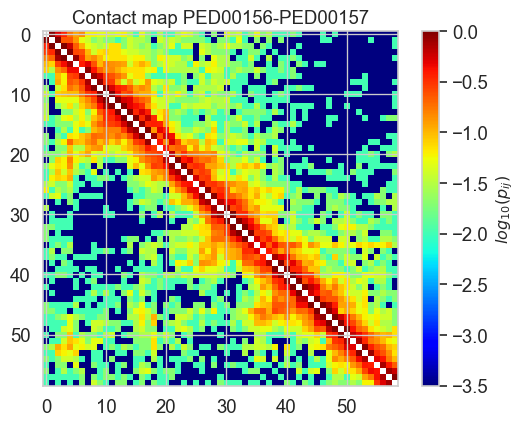

In [30]:
plot_cmap_comparison(contact_map_side_chain_dict['PED00156'],contact_map_side_chain_dict['PED00157'],'Contact map PED00156-PED00157')

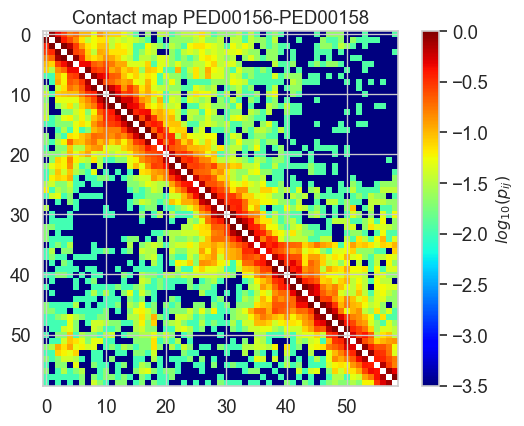

In [31]:
plot_cmap_comparison(contact_map_side_chain_dict['PED00156'],contact_map_side_chain_dict['PED00158'],'Contact map PED00156-PED00158')

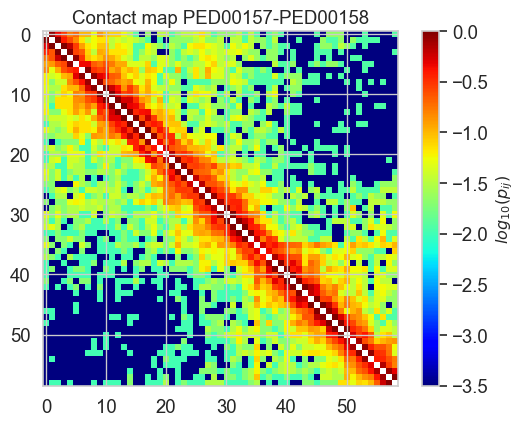

In [32]:
plot_cmap_comparison(contact_map_side_chain_dict['PED00157'],contact_map_side_chain_dict['PED00158'],'Contact map PED00157-PED00158')

### Distribution 

In [33]:
flattened_side_chain_mass_dict=flatten_matrices(distance_matrix_side_center_mass_dict)
flattened_side_chain_mass_dict

{'PED00156': array([0.        , 0.45516701, 0.8911563 , ..., 0.72273871, 0.61820967,
        0.        ]),
 'PED00157': array([0.        , 0.76260941, 0.80583568, ..., 0.82368618, 0.69078092,
        0.        ]),
 'PED00158': array([0.        , 0.66552851, 0.5672507 , ..., 0.95301373, 0.74549673,
        0.        ])}

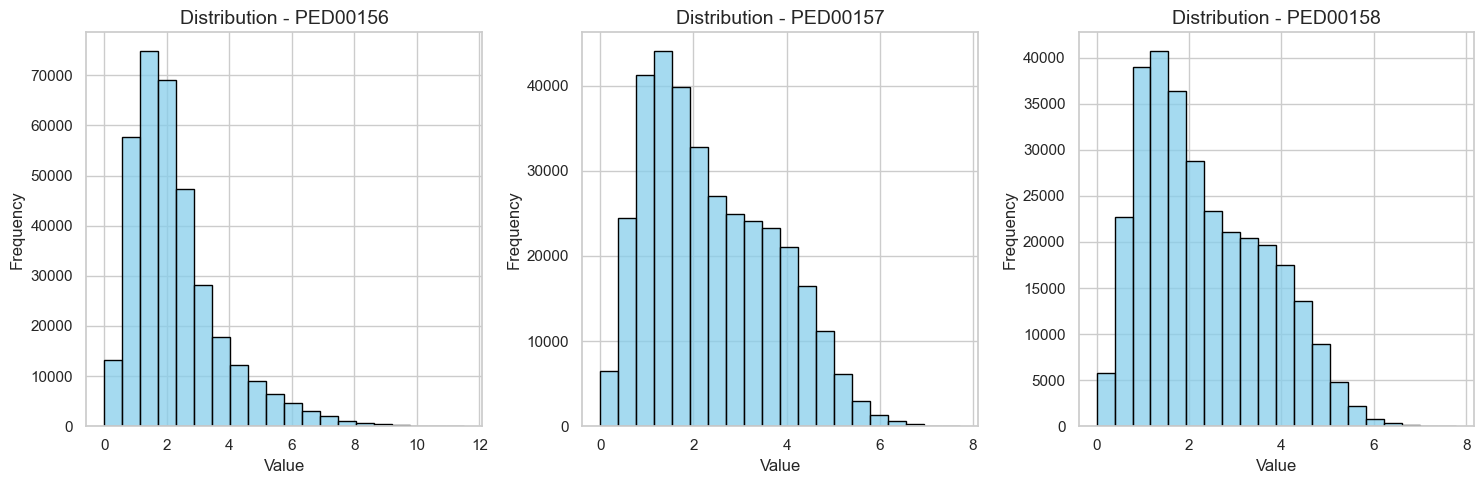

In [34]:
plot_flattened_data(flattened_side_chain_mass_dict)

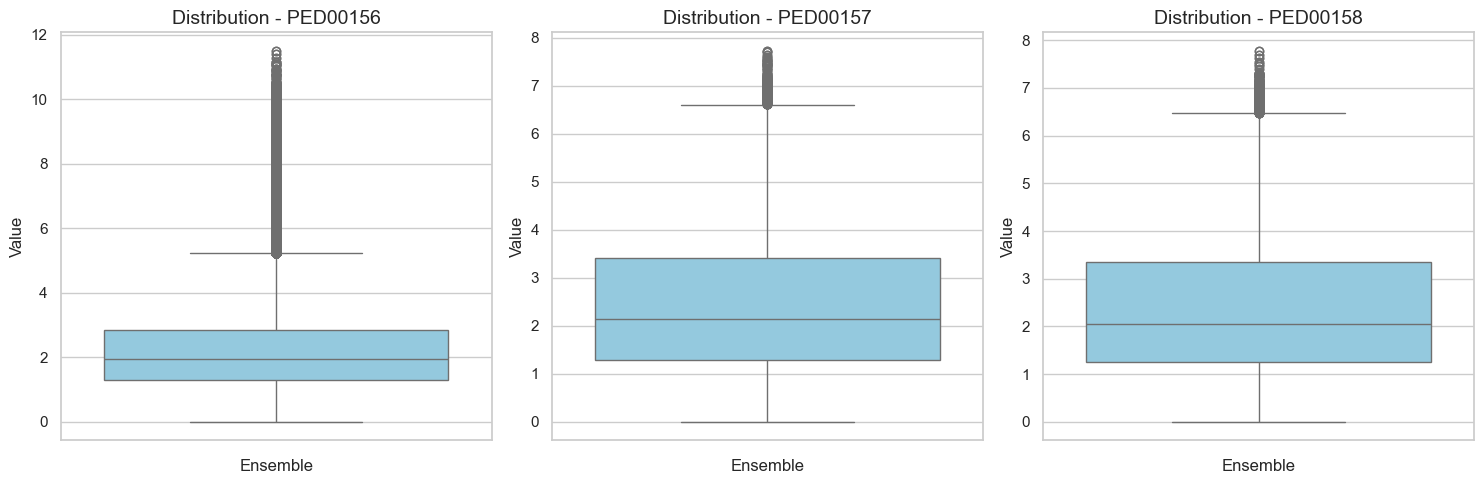

In [32]:
plot_boxplot(flattened_side_chain_mass_dict)

# Angles analysis-Phi and Psi angles

In [4]:
# Codes of the ensembles we want to analyze,corresponding PDB files.
ens_codes = ['PED00156','PED00157','PED00158']
  
# Directory with the PDB files.
pdb_dp = "/Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3"

# Featurization options.
featurization = "phi_psi"  # choices: "ca_dist", phi_psi,sc_center_of_mass_dist 
featurization_params = {"ca_dist": {"seq_sep": 2, "normalize": True},
                        "phi_psi": {},
                        "a_angle": {}}

In [5]:
pipeline = EnsembleAnalysis(pdb_dp=pdb_dp,
                            ens_codes=ens_codes)

# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3/PED00156.dcd.
- Found 100 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3/PED00157.dcd.
- Found 100 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3/PED00158.dcd.
- Found 88 conformations.


In [6]:
trajectories_angles= pipeline.trajectories
trajectories_angles

{'PED00156': <mdtraj.Trajectory with 100 frames, 941 atoms, 59 residues, without unitcells at 0x10f1a4740>,
 'PED00157': <mdtraj.Trajectory with 100 frames, 939 atoms, 59 residues, without unitcells at 0x134441af0>,
 'PED00158': <mdtraj.Trajectory with 88 frames, 939 atoms, 59 residues, without unitcells at 0x134923cb0>}

In [7]:
dict_phi_psi_splitted=featurize_and_split_phi_psi(trajectories_angles)

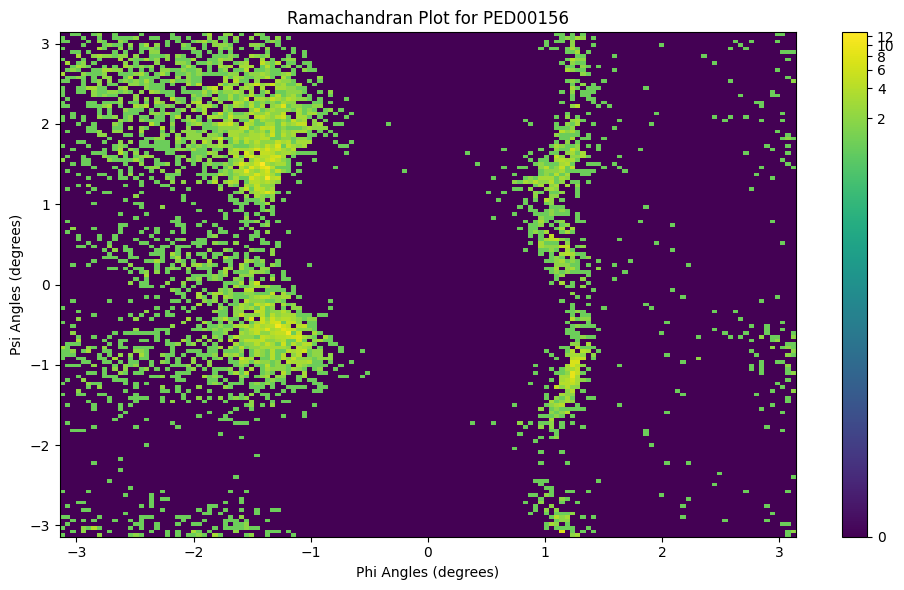

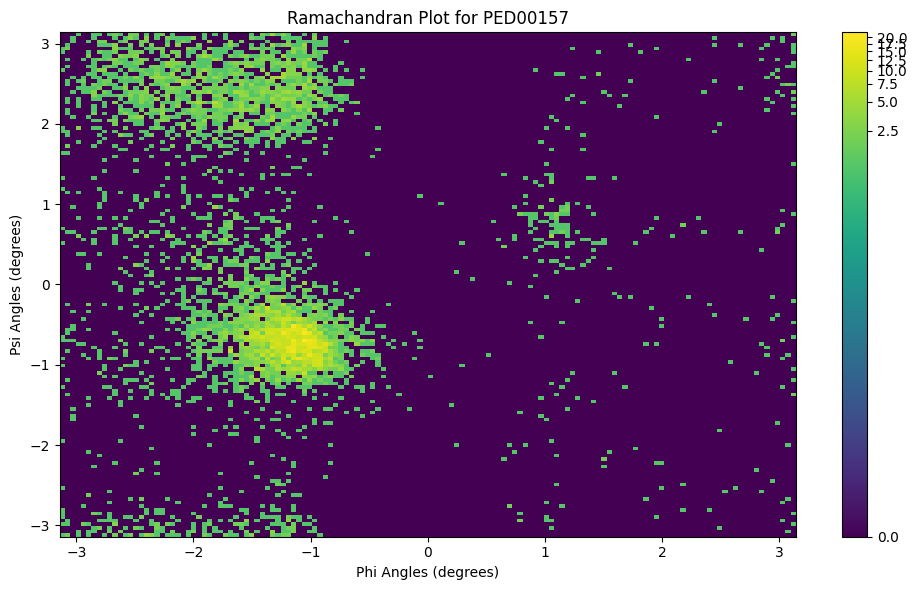

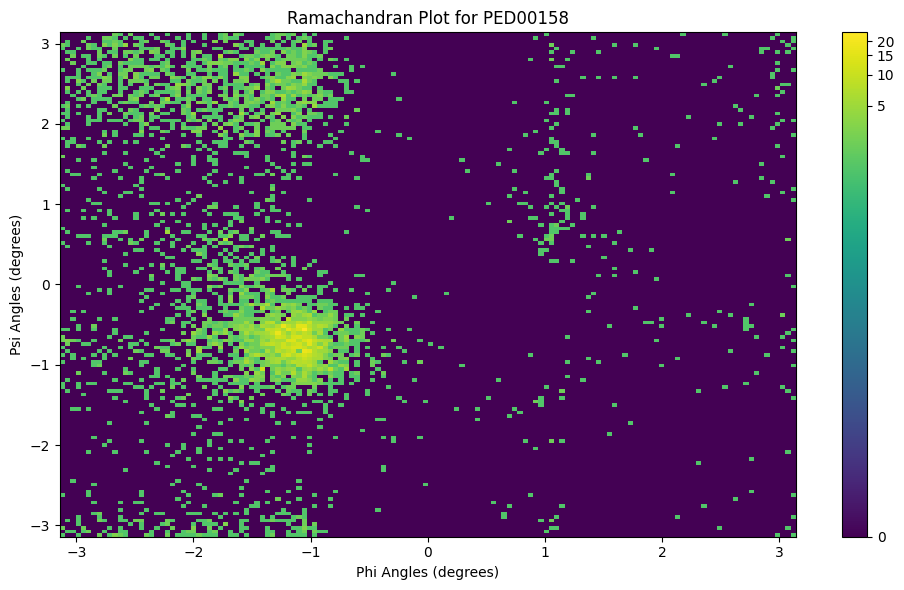

In [8]:
Ramachandran_plot_phi_psi(dict_phi_psi_splitted)

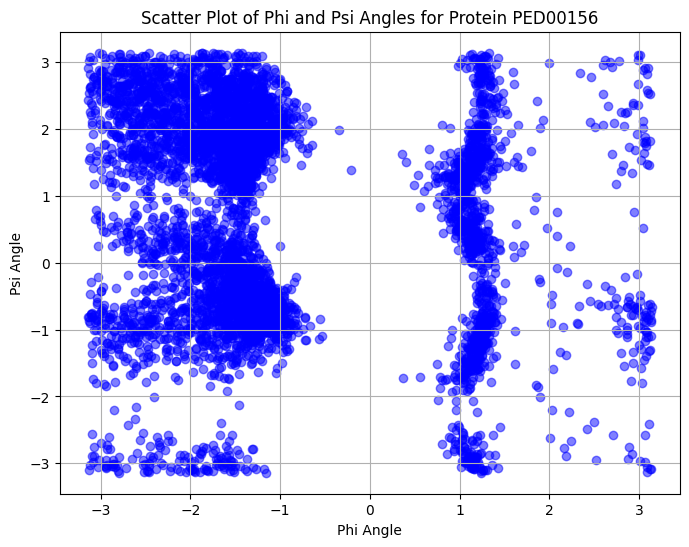

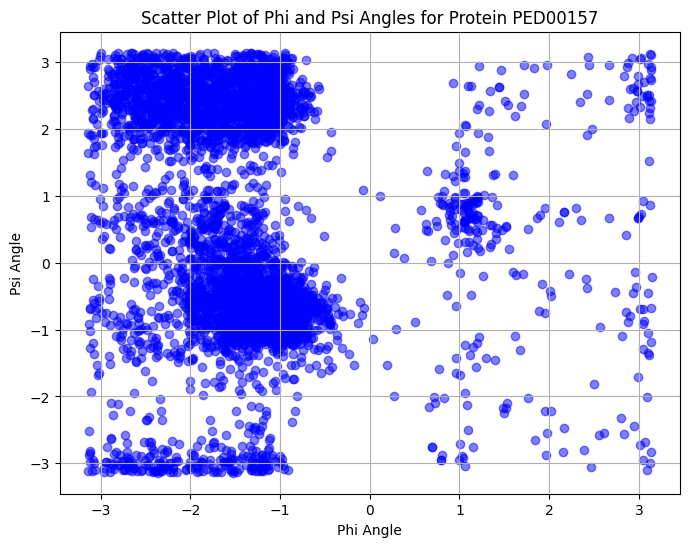

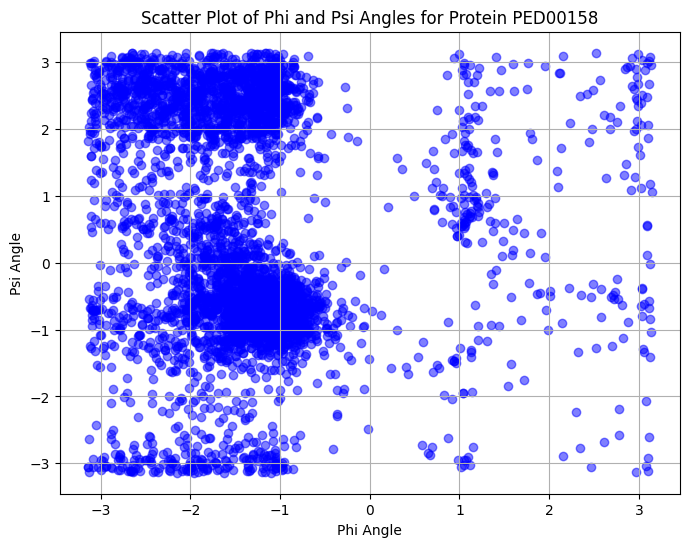

In [9]:
scatter_plot_phi_psi(dict_phi_psi_splitted)

In [10]:
four_consecutive_indices_Calpha=consecutive_4_indices_of_Calpha(trajectories_angles)

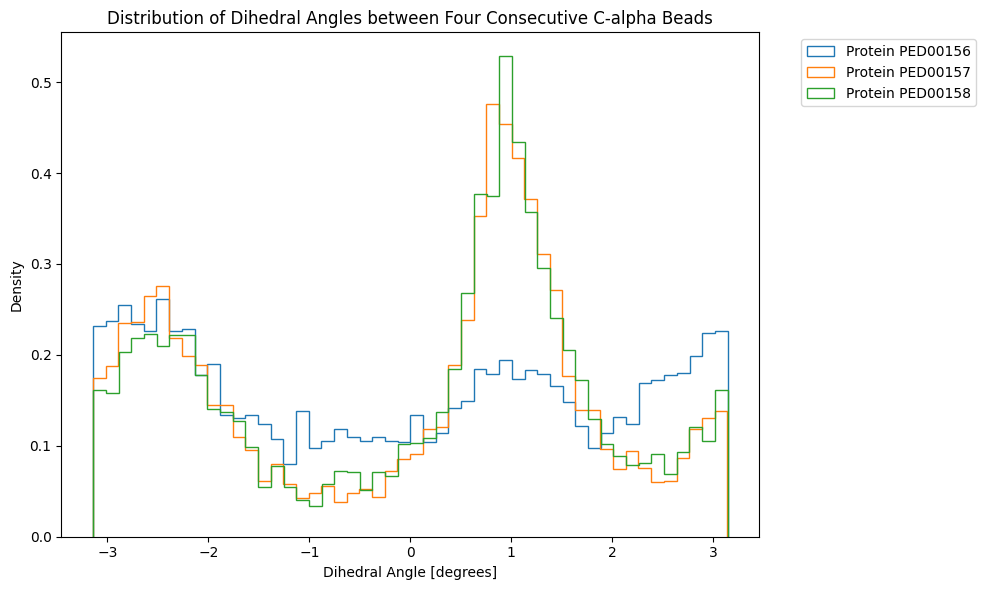

In [11]:
plot_distribution_dihedral_angles(trajectories_angles, four_consecutive_indices_Calpha)

## Global analysis
### Radius-of-gyration

In [2]:
# Codes of the ensembles we want to analyze,corresponding PDB files.
ens_codes = ['PED00156','PED00157','PED00158']
  
# Directory with the PDB files.
pdb_dp = "/Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3"

# Featurization options.
featurization = "ca_dist"  # choices: "ca_dist", phi_psi,sc_center_of_mass_dist 
featurization_params = {"ca_dist": {"seq_sep": 2, "normalize": True},
                        "phi_psi": {},
                        "a_angle": {}}
pipeline = EnsembleAnalysis(pdb_dp=pdb_dp,
                            ens_codes=ens_codes)

# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3/PED00156.dcd.
- Found 100 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3/PED00157.dcd.


- Found 100 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3/PED00158.dcd.
- Found 88 conformations.


In [3]:
trajectories= pipeline.trajectories
Rgs_dict=rg_calculator_dict(trajectories)

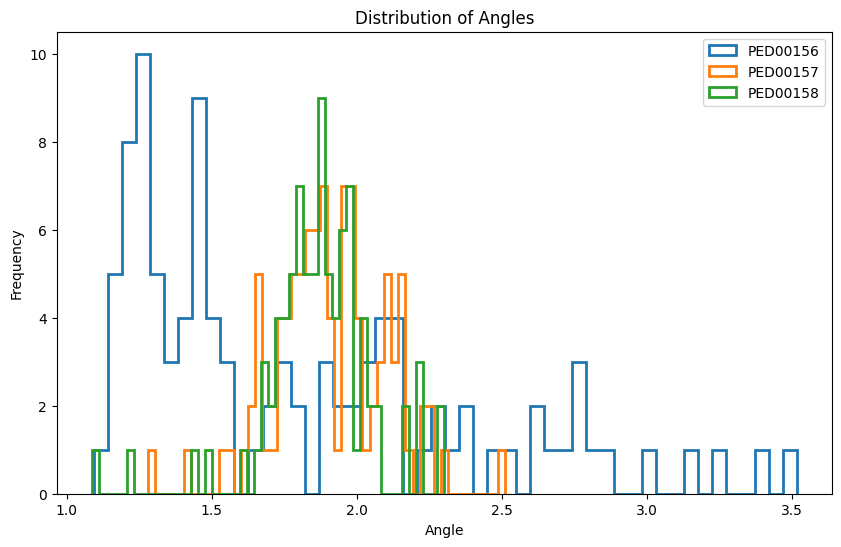

In [4]:
plot_distribution_of_Rgs(Rgs_dict)

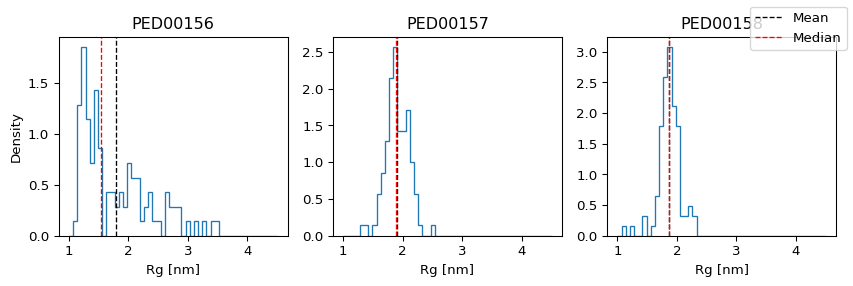

In [5]:
plot_rg_comparison(Rgs_dict)

### Alpha-helix content

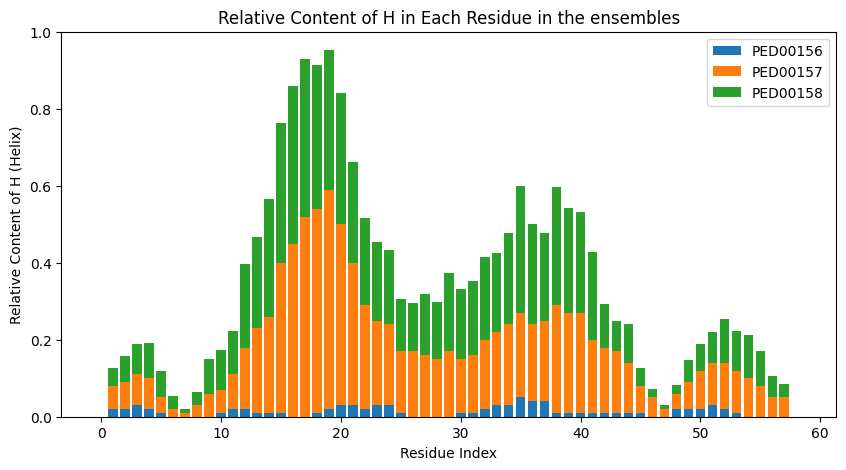

In [18]:
dssp_dict=get_dssp_dict(trajectories)
plot_relative_helix_content_multiple_proteins(dssp_dict)

### Asphericity

In [31]:
gyration_tensors_dict=get_gyration_tensors_dict(trajectories)
asphericity_dict=calculate_asphericity_dict(gyration_tensors_dict)

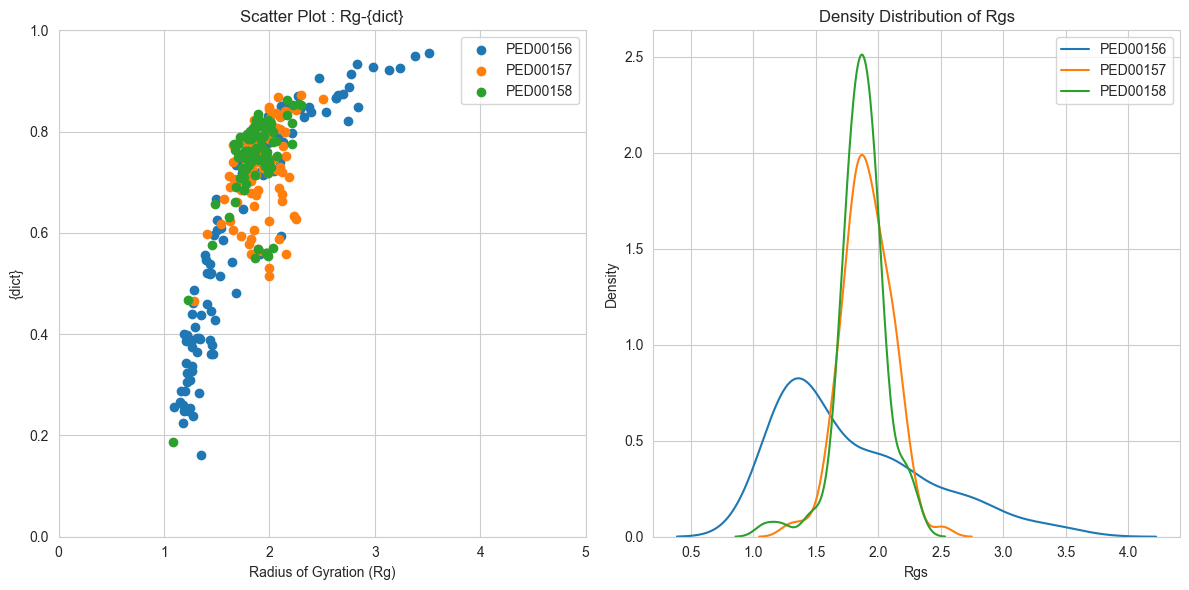

In [32]:
scatterplot_rg_asphericity(Rgs_dict, asphericity_dict)

## Prolateness

In [33]:
gyration_tensors_dict=get_gyration_tensors_dict(trajectories)
prolateness_dict=calculate_prolateness_dict(gyration_tensors_dict)

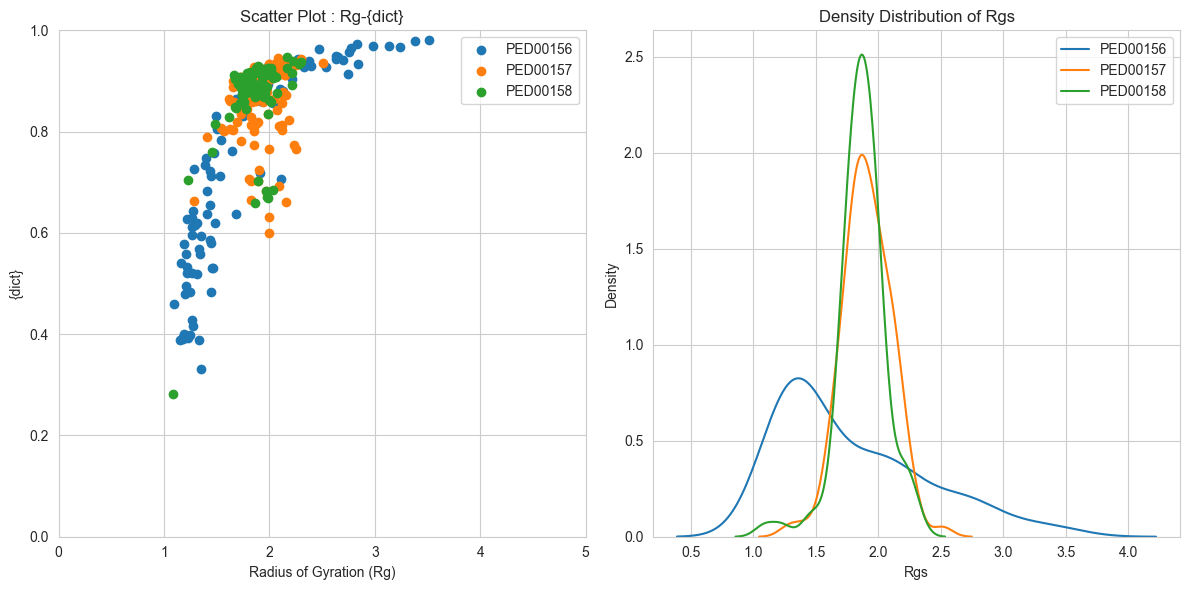

In [34]:
scatterplot_rg_asphericity(Rgs_dict,prolateness_dict)

## End-to-End distance

In [10]:
def calculate_end_to_end_distance(trajs):
    """Calculate the end-to-end distance for each trajectory."""
    end_to_end_distances = {}

    for traj_id, traj_list in trajs.items():
        for traj in traj_list:
            # Select indices of carbon alpha atoms
            ca_indices = traj.topology.select("protein and name CA")
            # Calculate the Euclidean distance between the end coordinates
            distance = mdtraj.compute_distances(traj, [[ca_indices[0], ca_indices[-1]]])
            end_to_end_distances.setdefault(traj_id, []).extend(distance.flatten())  # Flatten and extend distances

    return end_to_end_distances

calculate_end_to_end_distance(trajectories)

{'PED00156': [1.9722928,
  3.716123,
  2.661436,
  2.4005356,
  2.5823495,
  2.619791,
  2.3565128,
  2.4201193,
  3.1144252,
  1.647861,
  1.0321934,
  2.3425572,
  3.1397455,
  1.9150764,
  2.3792498,
  2.2898676,
  2.4169421,
  0.7848213,
  2.2493308,
  2.4312067,
  2.455752,
  4.800302,
  1.7174416,
  3.4158633,
  3.4306953,
  4.644309,
  3.176864,
  3.241089,
  4.1517086,
  2.1416974,
  3.8808196,
  5.492471,
  3.403282,
  5.6722417,
  3.3166227,
  2.3252287,
  6.1041512,
  4.8148265,
  3.5915253,
  5.7398157,
  6.96898,
  2.2085912,
  7.0238957,
  7.02738,
  5.452112,
  7.248315,
  6.602384,
  5.82746,
  4.0948668,
  3.4329221,
  5.1905065,
  2.2919478,
  1.7693805,
  6.26338,
  6.03026,
  3.758844,
  5.053726,
  6.082901,
  1.7211866,
  2.2666028,
  4.583552,
  4.8539248,
  6.217304,
  7.125154,
  7.3160152,
  7.192537,
  7.8351464,
  2.8339067,
  8.729662,
  5.420853,
  7.6493173,
  10.765644,
  6.0963187,
  3.5918608,
  3.0850878,
  5.8273625,
  2.835864,
  3.045845,
  5.36429

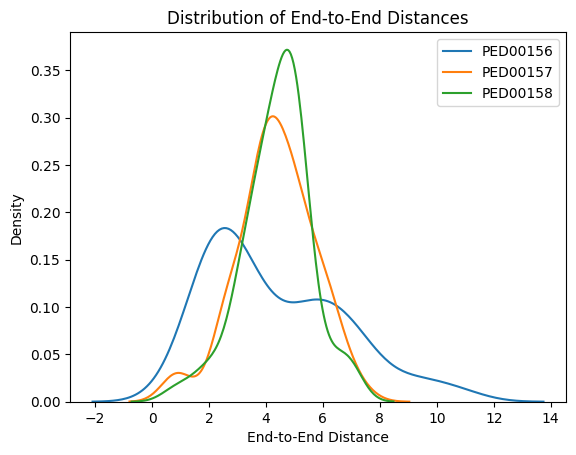

In [6]:
calculate_and_plot_end_to_end_distance(trajectories)

In [15]:
for key, array in xyz_coordinates_dict.items():
    mean = np.mean(array, axis=0)
    std = np.std(array, axis=0)
    median = np.median(array, axis=0)
    min_val = np.min(array, axis=0)
    max_val = np.max(array, axis=0)
    
    print(f"Descriptive statistics for {key}:")
    print("Mean:", mean)
    print("Standard deviation:", std)
    print("Median:", median)
    print("Minimum:", min_val)
    print("Maximum:", max_val)
    print()

Descriptive statistics for PED00156:
Mean: [[ 0.02933999  0.14249401  0.027299  ]
 [ 0.01002301  0.137697    0.01810499]
 [ 0.00614701  0.13793798  0.022331  ]
 ...
 [ 0.03776799 -0.01959901  0.08595001]
 [ 0.05064298 -0.00984799  0.08835202]
 [ 0.03496903 -0.02699201  0.08882403]]
Standard deviation: [[2.334805   0.9936483  0.7115729 ]
 [2.3565748  1.0165486  0.70040315]
 [2.3646832  1.0158073  0.70203495]
 ...
 [2.6432252  0.98938364 0.6057074 ]
 [2.647194   0.9977278  0.61341584]
 [2.6556392  0.99416643 0.6306557 ]]
Median: [[ 0.00645     0.07605    -0.0009    ]
 [-0.0592      0.03065    -0.0324    ]
 [-0.08275     0.02655    -0.02245   ]
 ...
 [ 0.26115    -0.03395     0.08195   ]
 [ 0.25085    -0.0132      0.045     ]
 [ 0.2753     -0.074       0.07890001]]
Minimum: [[-4.5099    -2.1757    -1.4342002]
 [-4.6906    -2.0784    -1.5293   ]
 [-4.7292    -2.1310003 -1.5367001]
 ...
 [-5.564     -2.4439    -1.3436002]
 [-5.6073    -2.5601003 -1.35     ]
 [-5.5417    -2.3843    -1.3532  

In [80]:
descriptive_stats = {
    'mean': {},
    'std': {},
    'median': {},
    'min': {},
    'max': {}
}

for key, array in xyz_coordinates_dict.items():
    mean = np.mean(array, axis=0)
    std = np.std(array, axis=0)
    median = np.median(array, axis=0)
    min_val = np.min(array, axis=0)
    max_val = np.max(array, axis=0)
    
    descriptive_stats['mean'][key] = mean
    descriptive_stats['std'][key] = std
    descriptive_stats['median'][key] = median
    descriptive_stats['min'][key] = min_val
    descriptive_stats['max'][key] = max_val

print("Descriptive statistics:")
print(descriptive_stats)


Descriptive statistics:
{'mean': {'PED00156': array([[ 0.02933999,  0.14249401,  0.027299  ],
       [ 0.01002301,  0.137697  ,  0.01810499],
       [ 0.00614701,  0.13793798,  0.022331  ],
       ...,
       [ 0.03776799, -0.01959901,  0.08595001],
       [ 0.05064298, -0.00984799,  0.08835202],
       [ 0.03496903, -0.02699201,  0.08882403]], dtype=float32), 'PED00157': array([[-0.05594899, -0.12039601,  0.098889  ],
       [-0.02938198, -0.161327  ,  0.1909341 ],
       [ 0.00514798, -0.20449504, -0.007404  ],
       ...,
       [-0.06600403, -0.10591602, -0.04128596],
       [-0.06349601, -0.10149803, -0.05115098],
       [-0.061114  , -0.11646801, -0.03319002]], dtype=float32), 'PED00158': array([[ 0.06482387, -0.2449659 , -0.06448293],
       [ 0.0831534 , -0.28006026,  0.02449886],
       [ 0.12229998, -0.33150336, -0.15792727],
       ...,
       [-0.01580341, -0.14039658, -0.15201478],
       [-0.00145566, -0.1469114 , -0.15698864],
       [-0.02795794, -0.13158861, -0.1503466

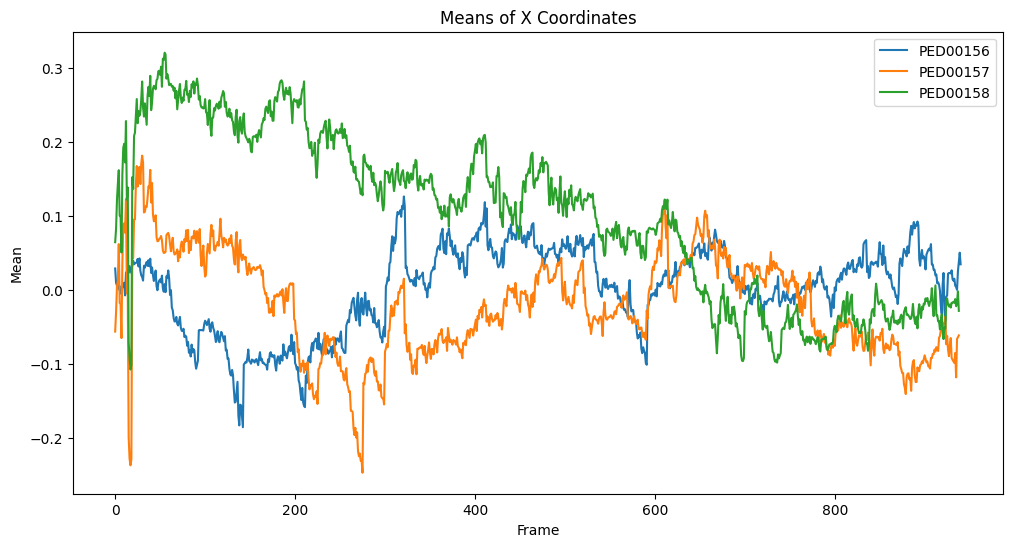

In [83]:

# Mean graph
plt.figure(figsize=(12, 6))
for key, mean in descriptive_stats['mean'].items():
    plt.plot(mean[:, 0], label=key)  # Plotting for X coordinate only
plt.title('Means of X Coordinates')
plt.xlabel('Frame')
plt.ylabel('Mean')
plt.legend()
plt.show()


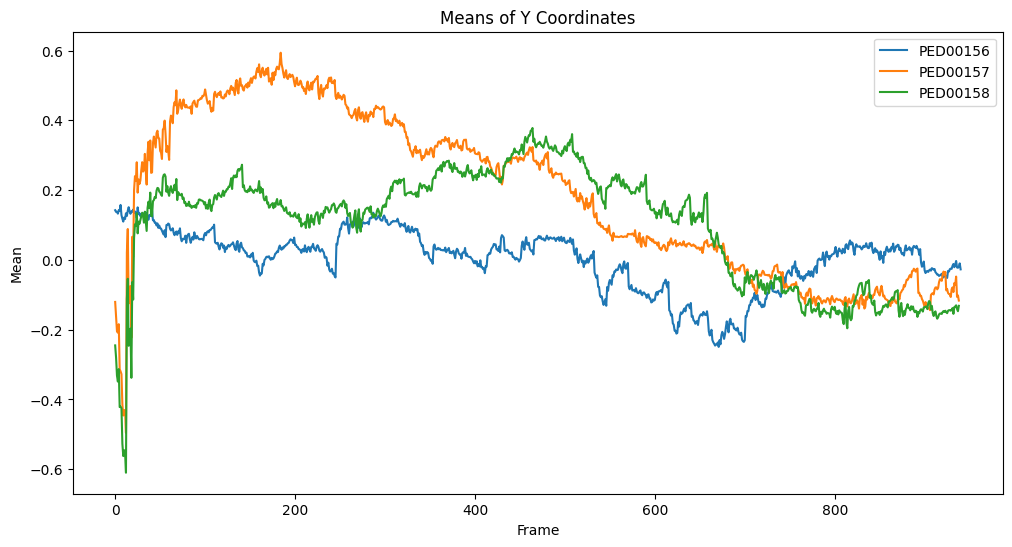

In [84]:
# Mean graph
plt.figure(figsize=(12, 6))
for key, mean in descriptive_stats['mean'].items():
    plt.plot(mean[:, 1], label=key)  # Plotting for X coordinate only
plt.title('Means of Y Coordinates')
plt.xlabel('Frame')
plt.ylabel('Mean')
plt.legend()
plt.show()


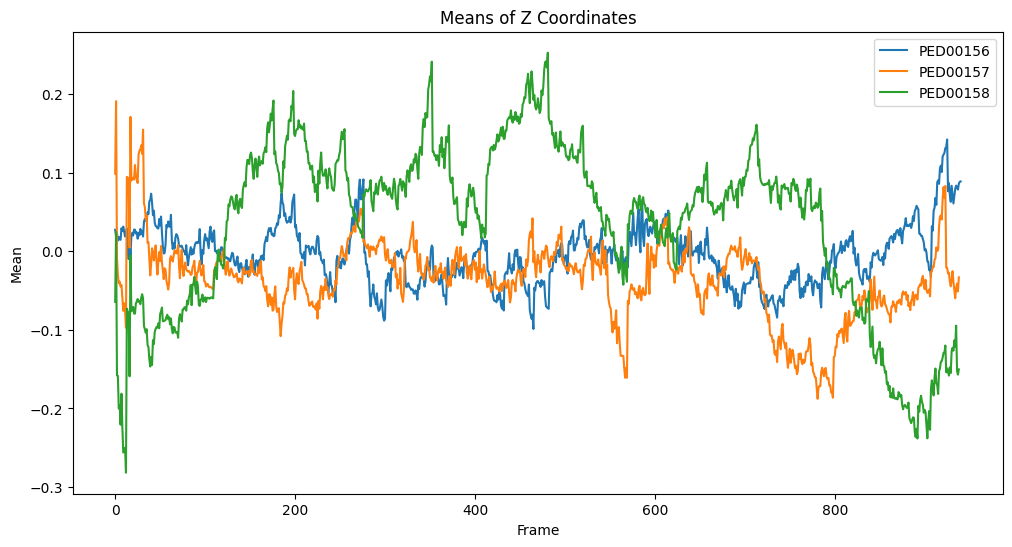

In [85]:
# Mean graph
plt.figure(figsize=(12, 6))
for key, mean in descriptive_stats['mean'].items():
    plt.plot(mean[:, 2], label=key)  # Plotting for X coordinate only
plt.title('Means of Z Coordinates')
plt.xlabel('Frame')
plt.ylabel('Mean')
plt.legend()
plt.show()


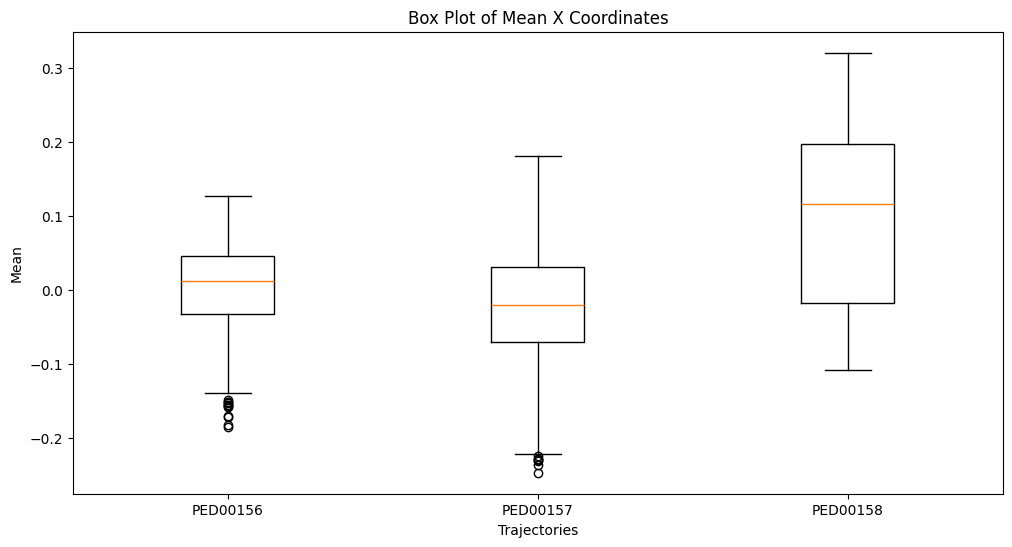

In [86]:
plt.figure(figsize=(12, 6))
data = [mean[:, 0] for mean in descriptive_stats['mean'].values()]
plt.boxplot(data, labels=list(descriptive_stats['mean'].keys()))
plt.title('Box Plot of Mean X Coordinates')
plt.xlabel('Trajectories')
plt.ylabel('Mean')
plt.show()



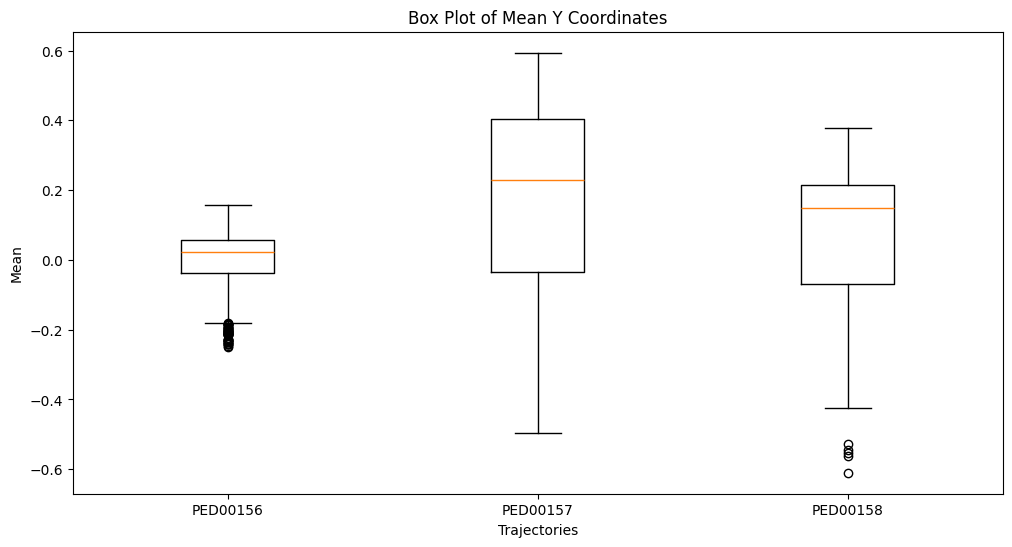

In [87]:
plt.figure(figsize=(12, 6))
data = [mean[:, 1] for mean in descriptive_stats['mean'].values()]
plt.boxplot(data, labels=list(descriptive_stats['mean'].keys()))
plt.title('Box Plot of Mean Y Coordinates')
plt.xlabel('Trajectories')
plt.ylabel('Mean')
plt.show()


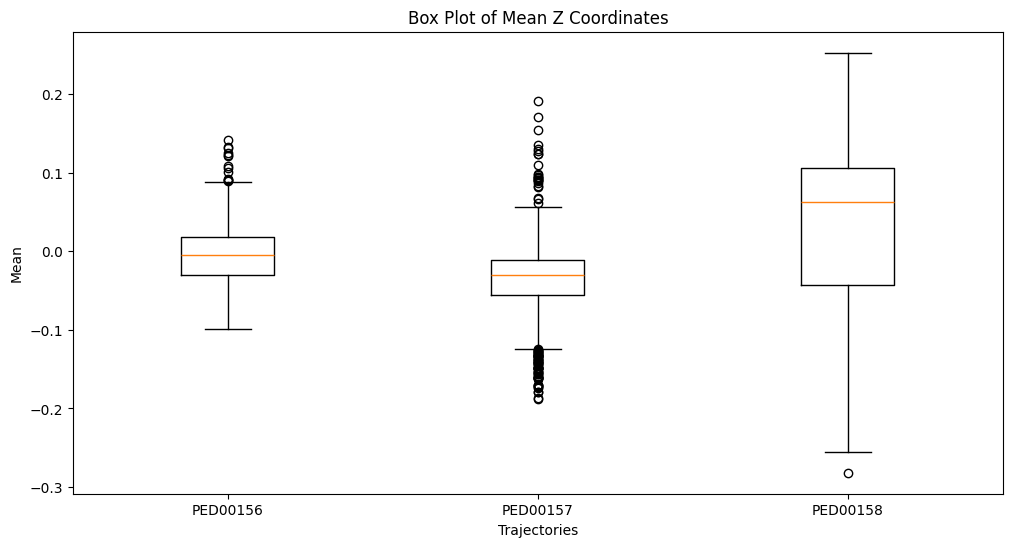

In [88]:
plt.figure(figsize=(12, 6))
data = [mean[:, 2] for mean in descriptive_stats['mean'].values()]
plt.boxplot(data, labels=list(descriptive_stats['mean'].keys()))
plt.title('Box Plot of Mean Z Coordinates')
plt.xlabel('Trajectories')
plt.ylabel('Mean')
plt.show()


Standard deviation of coordinates over different proteins

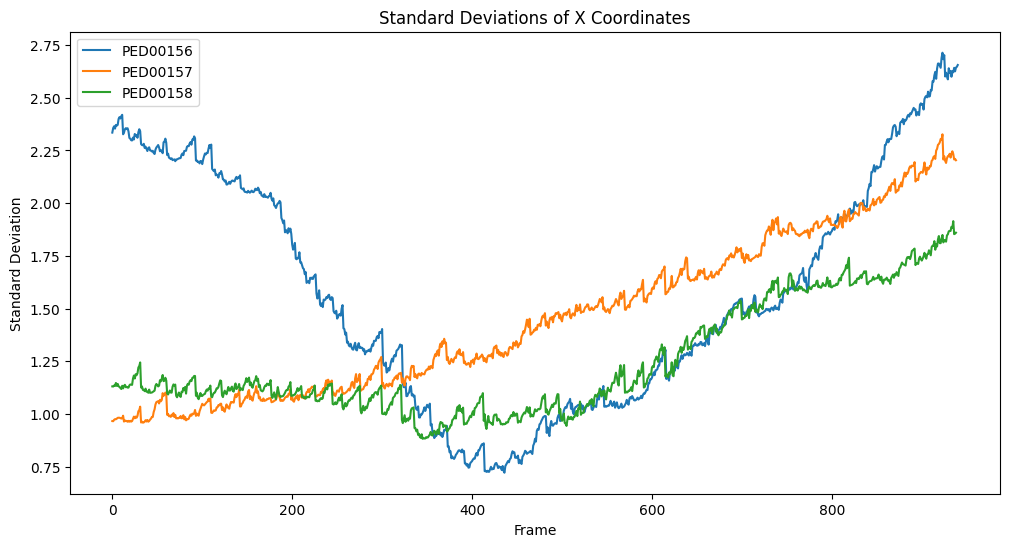

In [89]:
plt.figure(figsize=(12, 6))
for key, std in descriptive_stats['std'].items():
    plt.plot(std[:, 0], label=key)  # Plotting for X coordinate only
plt.title('Standard Deviations of X Coordinates')
plt.xlabel('Frame')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()


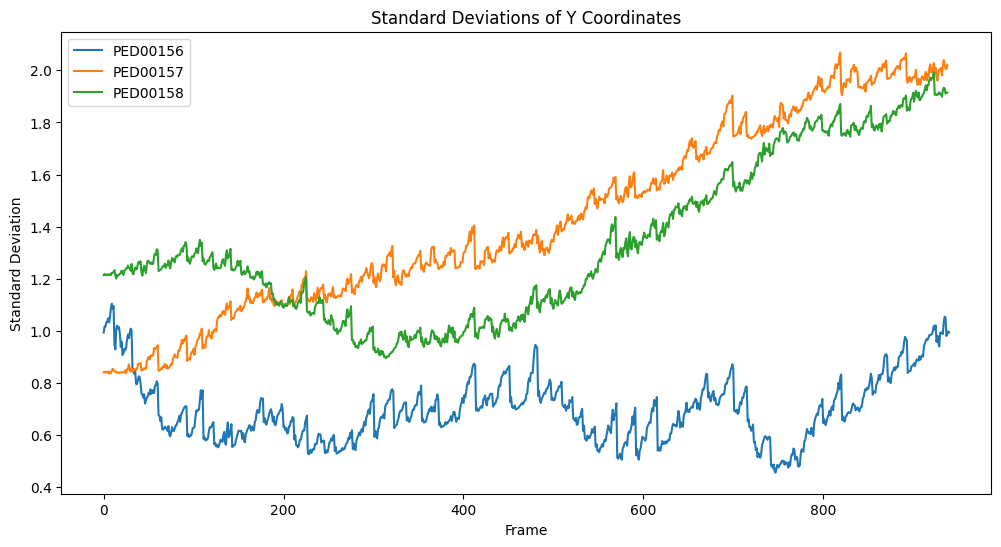

In [90]:
plt.figure(figsize=(12, 6))
for key, std in descriptive_stats['std'].items():
    plt.plot(std[:, 1], label=key)  # Plotting for X coordinate only
plt.title('Standard Deviations of Y Coordinates')
plt.xlabel('Frame')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()


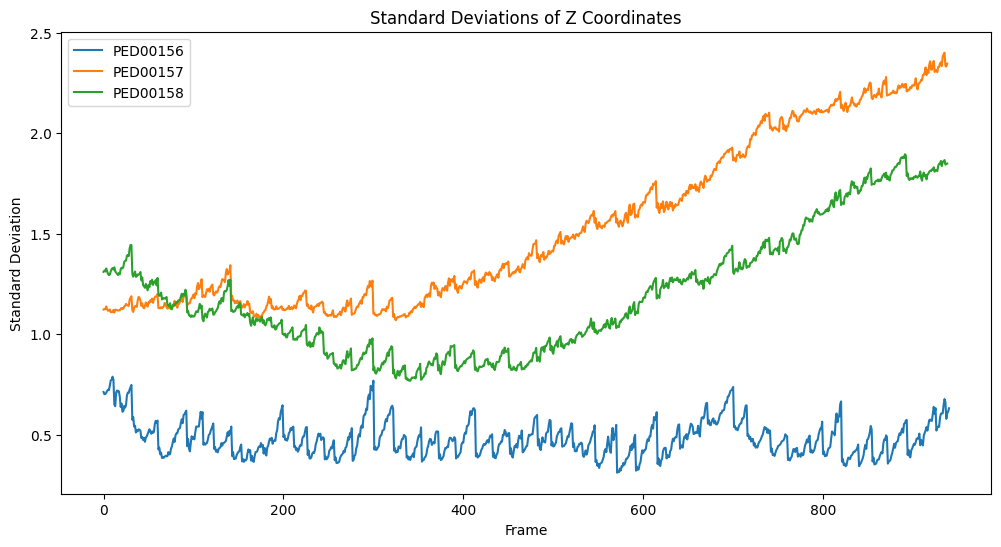

In [91]:
plt.figure(figsize=(12, 6))
for key, std in descriptive_stats['std'].items():
    plt.plot(std[:, 2], label=key)  # Plotting for X coordinate only
plt.title('Standard Deviations of Z Coordinates')
plt.xlabel('Frame')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()


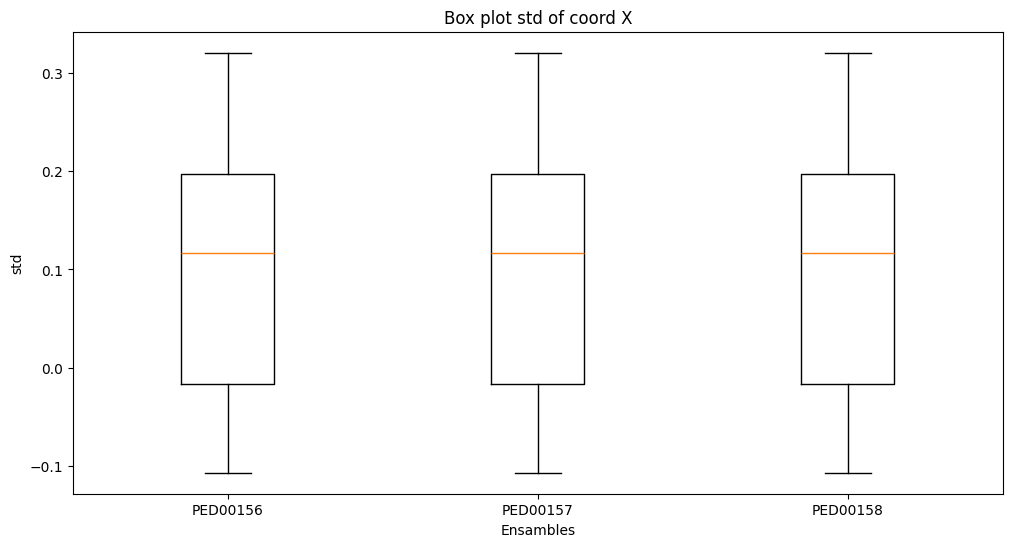

In [44]:
plt.figure(figsize=(12, 6))
data = [mean[:, 0] for std in descriptive_stats['std'].values()]
plt.boxplot(data, labels=list(descriptive_stats['std'].keys()))
plt.title('Box plot std of coord X')
plt.xlabel('Ensambles')
plt.ylabel('std')
plt.show()

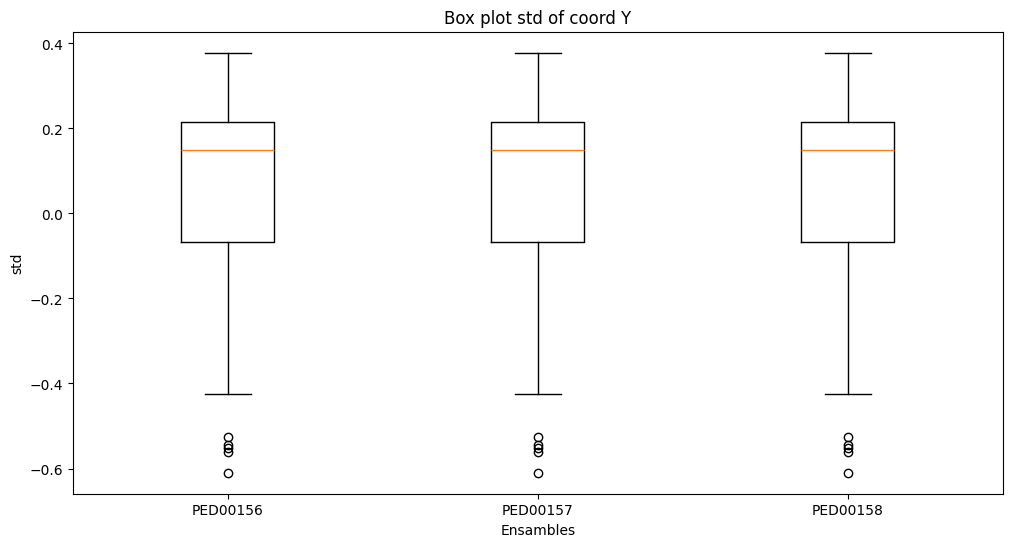

In [45]:
plt.figure(figsize=(12, 6))
data = [mean[:, 1] for std in descriptive_stats['std'].values()]
plt.boxplot(data, labels=list(descriptive_stats['std'].keys()))
plt.title('Box plot std of coord Y')
plt.xlabel('Ensambles')
plt.ylabel('std')
plt.show()

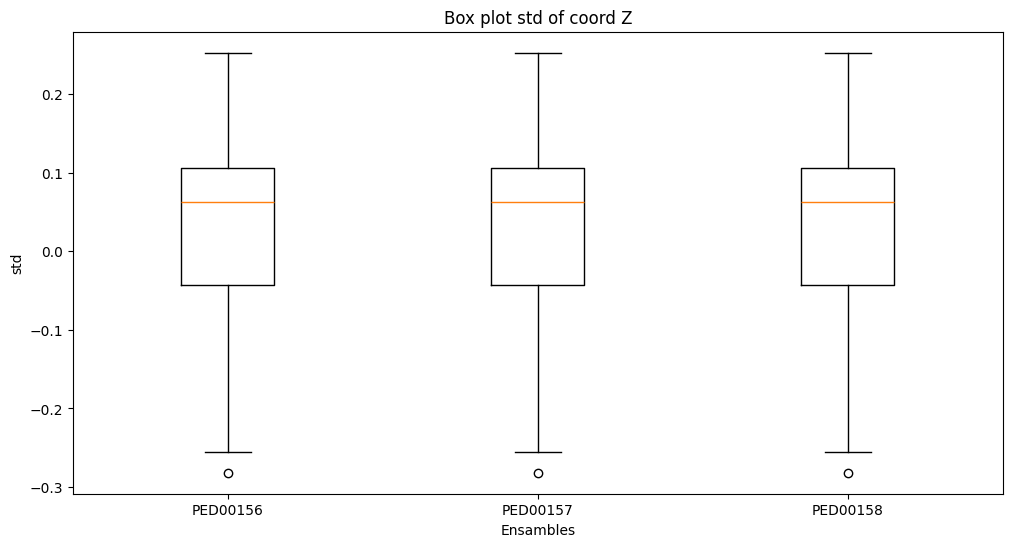

In [46]:
plt.figure(figsize=(12, 6))
data = [mean[:, 2] for std in descriptive_stats['std'].values()]
plt.boxplot(data, labels=list(descriptive_stats['std'].keys()))
plt.title('Box plot std of coord Z')
plt.xlabel('Ensambles')
plt.ylabel('std')
plt.show()

plots illustrating the median values of X coordinates over different frames for each protein in the descriptive statistics dictionary

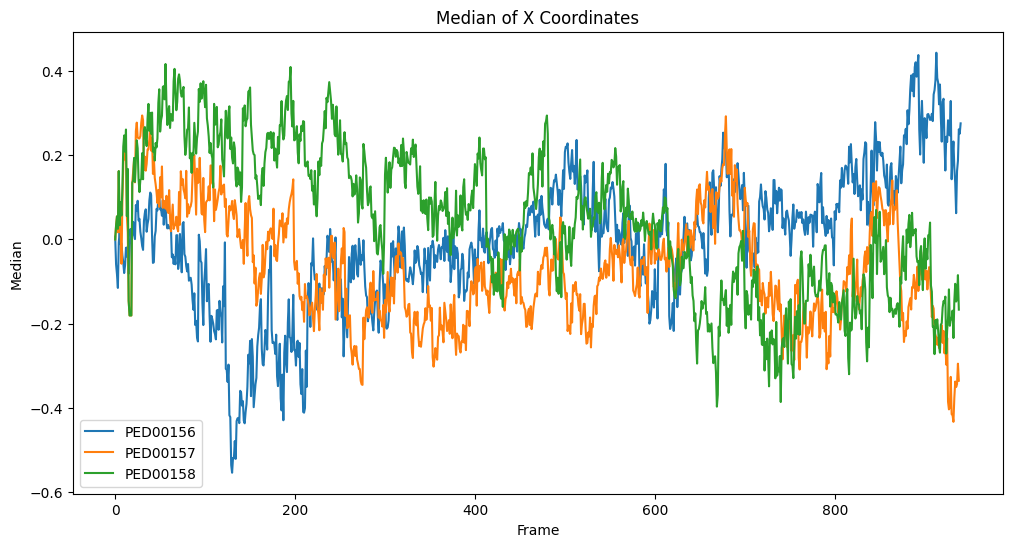

In [92]:
# Plotting the median of X coordinates for each protein
plt.figure(figsize=(12, 6))
for key, median in descriptive_stats['median'].items():
    plt.plot(median[:, 0], label=key)  # Plotting for X coordinate only
plt.title('Median of X Coordinates')
plt.xlabel('Frame')
plt.ylabel('Median')
plt.legend()
plt.show()


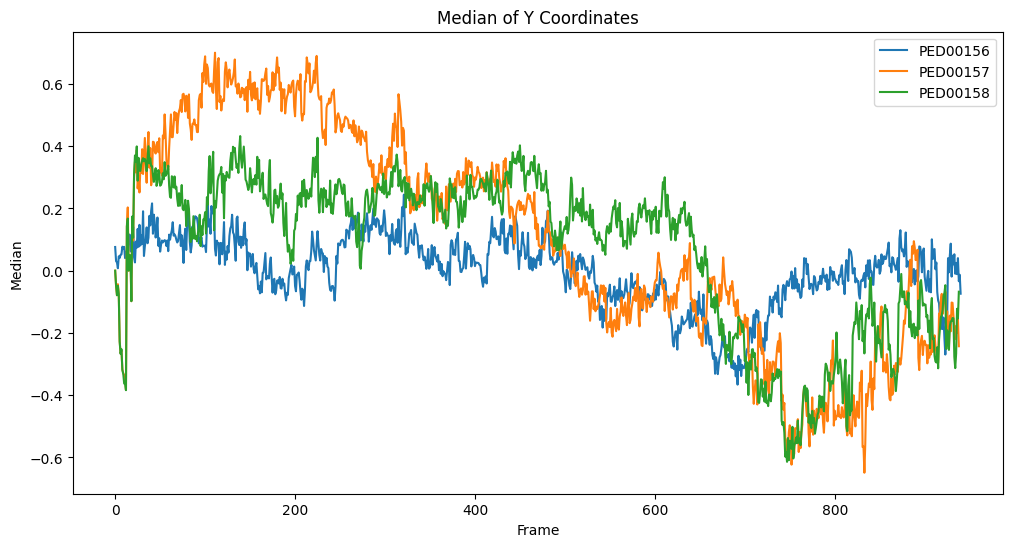

In [94]:
# Plotting the median of X coordinates for each protein
plt.figure(figsize=(12, 6))
for key, median in descriptive_stats['median'].items():
    plt.plot(median[:, 1], label=key)  # Plotting for X coordinate only
plt.title('Median of Y Coordinates')
plt.xlabel('Frame')
plt.ylabel('Median')
plt.legend()
plt.show()


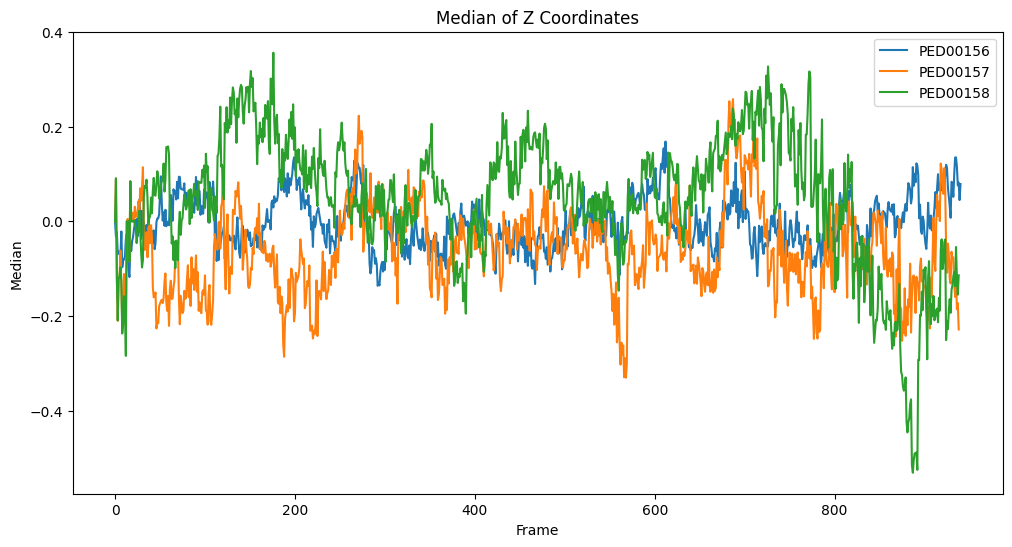

In [95]:
# Plotting the median of X coordinates for each protein
plt.figure(figsize=(12, 6))
for key, median in descriptive_stats['median'].items():
    plt.plot(median[:, 2], label=key)  # Plotting for X coordinate only
plt.title('Median of Z Coordinates')
plt.xlabel('Frame')
plt.ylabel('Median')
plt.legend()
plt.show()


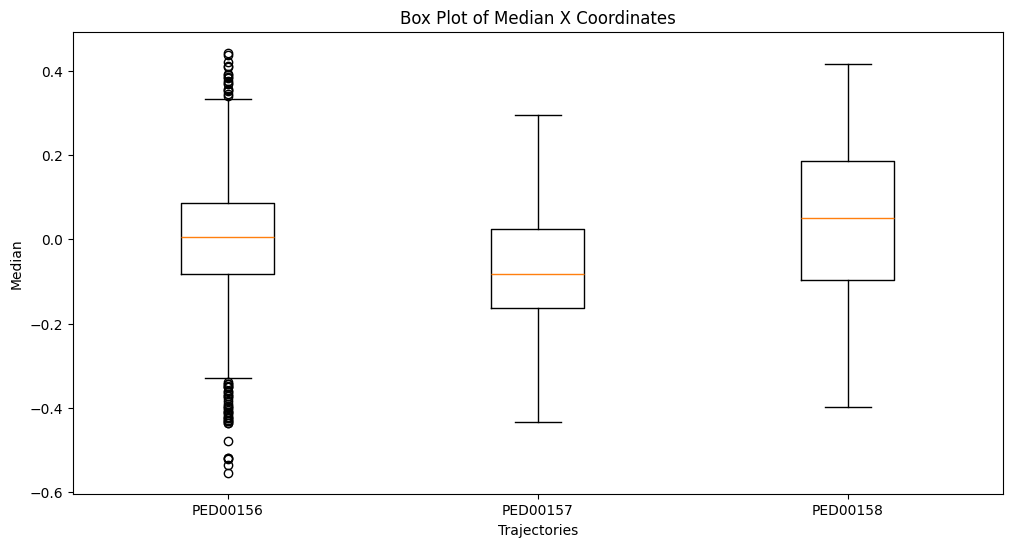

In [96]:
# Plotting the box plot of median X coordinates for each protein
plt.figure(figsize=(12, 6))
data = [median[:, 0] for median in descriptive_stats['median'].values()]
plt.boxplot(data, labels=list(descriptive_stats['median'].keys()))
plt.title('Box Plot of Median X Coordinates')
plt.xlabel('Trajectories')
plt.ylabel('Median')
plt.show()



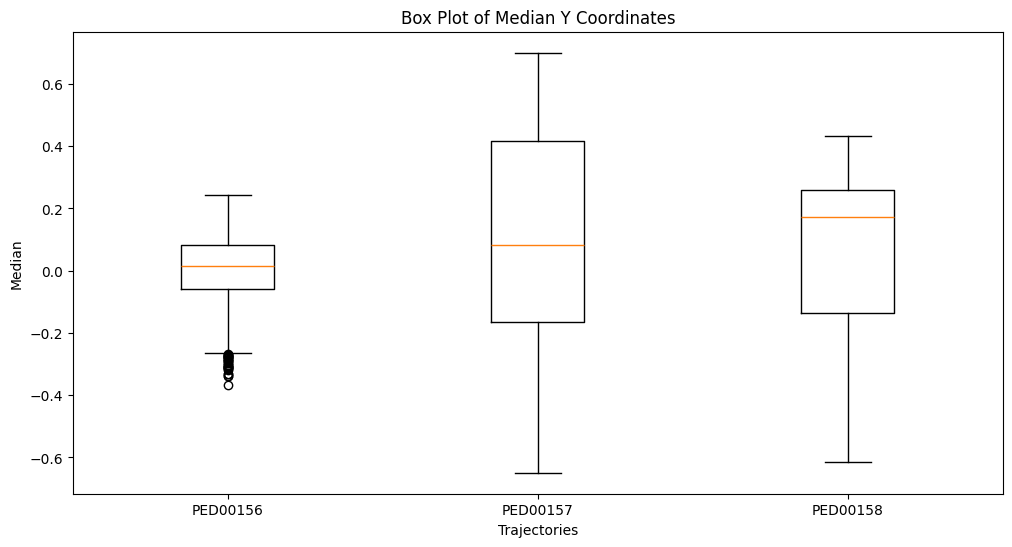

In [97]:
plt.figure(figsize=(12, 6))
data = [median[:, 1] for median in descriptive_stats['median'].values()]
plt.boxplot(data, labels=list(descriptive_stats['median'].keys()))
plt.title('Box Plot of Median Y Coordinates')
plt.xlabel('Trajectories')
plt.ylabel('Median')
plt.show()


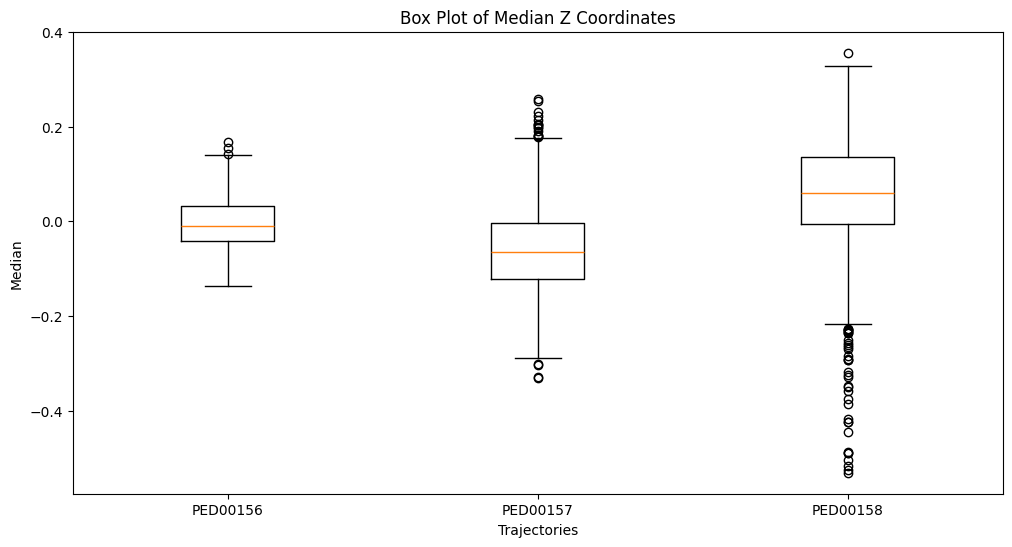

In [98]:
plt.figure(figsize=(12, 6))
data = [median[:, 2] for median in descriptive_stats['median'].values()]
plt.boxplot(data, labels=list(descriptive_stats['median'].keys()))
plt.title('Box Plot of Median Z Coordinates')
plt.xlabel('Trajectories')
plt.ylabel('Median')
plt.show()


This function statistical_tests_ performs various statistical tests to analyze the distributions of x,y,z coordinates between different proteins. It conducts T-tests to compare distributions between pairs of proteins, ANOVA to compare distributions among multiple proteins, and the Kolmogorov-Smirnov test to assess the significance of distribution differences. Each test provides statistical measures such as t-statistic, F-statistic, and p-value to evaluate the differences in distributions.

In [99]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [100]:
def statistical_tests_x(xyz_coordinates_dict):
    # T-test to compare the distributions of X coordinates between two proteins
    protein1 = 'PED00156'
    protein2 = 'PED00157'
    protein3 = 'PED00158'
    t_statistic, p_value = stats.ttest_ind(xyz_coordinates_dict[protein1][:, 0], xyz_coordinates_dict[protein2][:, 0])
    print(f"T-test between {protein1} and {protein2}:")
    print(f"T-statistic: {t_statistic}, p-value: {p_value}")

    t_statistic, p_value = stats.ttest_ind(xyz_coordinates_dict[protein1][:, 0], xyz_coordinates_dict[protein3][:, 0])
    print(f"T-test between {protein1} and {protein3}:")
    print(f"T-statistic: {t_statistic}, p-value: {p_value}")

    t_statistic, p_value = stats.ttest_ind(xyz_coordinates_dict[protein2][:, 0], xyz_coordinates_dict[protein3][:, 0])
    print(f"T-test between {protein2} and {protein3}:")
    print(f"T-statistic: {t_statistic}, p-value: {p_value}")

    # ANOVA to compare the distributions of X coordinates among multiple proteins
    f_statistic, p_value = stats.f_oneway(*[array[:, 0] for array in xyz_coordinates_dict.values()])
    print(f"ANOVA for X coordinates:")
    print(f"F-statistic: {f_statistic}, p-value: {p_value}")

    # Kolmogorov-Smirnov test to assess the significance of distribution differences
    ks_statistic, p_value = stats.ks_2samp(xyz_coordinates_dict[protein1][:, 0], xyz_coordinates_dict[protein2][:, 0])
    print(f"Kolmogorov-Smirnov test between {protein1} and {protein2}:")
    print(f"KS-statistic: {ks_statistic}, p-value: {p_value}")


# Perform statistical and correlation analyses
statistical_tests_x(xyz_coordinates_dict)



T-test between PED00156 and PED00157:
T-statistic: [ 0.33585486  2.00937    -0.5361305 ], p-value: [0.7373359  0.04585565 0.59247017]
T-test between PED00156 and PED00158:
T-statistic: [-0.12911403  2.3915114   0.6032328 ], p-value: [0.89740694 0.01777619 0.5470887 ]
T-test between PED00157 and PED00158:
T-statistic: [-0.78561074  0.8208239   0.91624093], p-value: [0.4330952  0.41279733 0.36072695]
ANOVA for X coordinates:
F-statistic: [0.13981348 3.55278028 0.5443847 ], p-value: [0.86958001 0.02992041 0.58080076]
Kolmogorov-Smirnov test between PED00156 and PED00157:
KS-statistic: [0.26 0.36 0.26], p-value: [2.21993593e-03 3.75191429e-06 2.21993593e-03]


In [101]:
def statistical_tests_y(xyz_coordinates_dict):
    # T-test to compare the distributions of Y coordinates between two proteins
    protein1 = 'PED00156'
    protein2 = 'PED00157'
    protein3 = 'PED00158'
    t_statistic, p_value = stats.ttest_ind(xyz_coordinates_dict[protein1][:, 1], xyz_coordinates_dict[protein2][:, 1])
    print(f"T-test between {protein1} and {protein2}:")
    print(f"T-statistic: {t_statistic}, p-value: {p_value}")

    t_statistic, p_value = stats.ttest_ind(xyz_coordinates_dict[protein1][:, 1], xyz_coordinates_dict[protein3][:, 1])
    print(f"T-test between {protein1} and {protein3}:")
    print(f"T-statistic: {t_statistic}, p-value: {p_value}")

    t_statistic, p_value = stats.ttest_ind(xyz_coordinates_dict[protein2][:, 1], xyz_coordinates_dict[protein3][:, 1])
    print(f"T-test between {protein2} and {protein3}:")
    print(f"T-statistic: {t_statistic}, p-value: {p_value}")

    # ANOVA to compare the distributions of Y coordinates among multiple proteins
    f_statistic, p_value = stats.f_oneway(*[array[:, 1] for array in xyz_coordinates_dict.values()])
    print(f"ANOVA for Y coordinates:")
    print(f"F-statistic: {f_statistic}, p-value: {p_value}")

    # Kolmogorov-Smirnov test to assess the significance of distribution differences
    ks_statistic, p_value = stats.ks_2samp(xyz_coordinates_dict[protein1][:, 1], xyz_coordinates_dict[protein2][:, 1])
    print(f"Kolmogorov-Smirnov test between {protein1} and {protein2}:")
    print(f"KS-statistic: {ks_statistic}, p-value: {p_value}")

# Perform statistical tests and print the results
statistical_tests_y(xyz_coordinates_dict)


T-test between PED00156 and PED00157:
T-statistic: [ 0.15395741  2.2534614  -1.2982159 ], p-value: [0.8778001 0.0253262 0.1957233]
T-test between PED00156 and PED00158:
T-statistic: [-0.26407626  2.548814   -0.04202703], p-value: [0.7920135  0.01161649 0.9665222 ]
T-test between PED00157 and PED00158:
T-statistic: [-0.73241854  0.7803986   0.9299727 ], p-value: [0.46483508 0.4361483  0.3535906 ]
ANOVA for Y coordinates:
F-statistic: [0.11317261 4.14501202 0.81906215], p-value: [0.89303662 0.01680848 0.44187987]
Kolmogorov-Smirnov test between PED00156 and PED00157:
KS-statistic: [0.25 0.34 0.35], p-value: [3.72949236e-03 1.60571437e-05 7.85015913e-06]


In [103]:
def statistical_tests_z(xyz_coordinates_dict):
    # T-test to compare the distributions of Z coordinates between two proteins
    protein1 = 'PED00156'
    protein2 = 'PED00157'
    protein3 = 'PED00158'
    t_statistic, p_value = stats.ttest_ind(xyz_coordinates_dict[protein1][:, 2], xyz_coordinates_dict[protein2][:, 2])
    print(f"T-test between {protein1} and {protein2}:")
    print(f"T-statistic: {t_statistic}, p-value: {p_value}")

    t_statistic, p_value = stats.ttest_ind(xyz_coordinates_dict[protein1][:, 2], xyz_coordinates_dict[protein3][:, 2])
    print(f"T-test between {protein1} and {protein3}:")
    print(f"T-statistic: {t_statistic}, p-value: {p_value}")

    t_statistic, p_value = stats.ttest_ind(xyz_coordinates_dict[protein2][:, 2], xyz_coordinates_dict[protein3][:, 2])
    print(f"T-test between {protein2} and {protein3}:")
    print(f"T-statistic: {t_statistic}, p-value: {p_value}")

    # ANOVA to compare the distributions of Z coordinates among multiple proteins
    f_statistic, p_value = stats.f_oneway(*[array[:, 2] for array in xyz_coordinates_dict.values()])
    print(f"ANOVA for Z coordinates:")
    print(f"F-statistic: {f_statistic}, p-value: {p_value}")

    # Kolmogorov-Smirnov test to assess the significance of distribution differences
    ks_statistic, p_value = stats.ks_2samp(xyz_coordinates_dict[protein1][:, 2], xyz_coordinates_dict[protein2][:, 2])
    print(f"Kolmogorov-Smirnov test between {protein1} and {protein2}:")
    print(f"KS-statistic: {ks_statistic}, p-value: {p_value}")

# Perform statistical tests and print the results
statistical_tests_z(xyz_coordinates_dict)


T-test between PED00156 and PED00157:
T-statistic: [0.00388807 2.5845163  0.22327182], p-value: [0.9969017  0.01047075 0.82355416]
T-test between PED00156 and PED00158:
T-statistic: [-0.41793662  2.8706667   1.187305  ], p-value: [0.6764755  0.00457094 0.23662144]
T-test between PED00157 and PED00158:
T-statistic: [-0.7583928  0.8374694  0.8428186], p-value: [0.44917575 0.40340355 0.40041238]
ANOVA for Z coordinates:
F-statistic: [0.1545239  5.30589798 0.74776427], p-value: [0.85689475 0.00546439 0.47435031]
Kolmogorov-Smirnov test between PED00156 and PED00157:
KS-statistic: [0.26 0.34 0.28], p-value: [2.21993593e-03 1.60571437e-05 7.37702628e-04]


The site_specific_order_parameter function computes and returns the site-specific order parameter for each alpha carbon (CA) atom present in a given protein, based on an input molecular trajectory. This parameter represents a measure of structural coherence or rigidity at a specific site within the protein.

The computation of this parameter follows a detailed procedure:

-The cosines of the angles between the position vectors of consecutive CA atoms are computed for each conformation of the protein in the trajectory.

-Based on the computed cosines of angles, the means and variances are determined.

-Using the variances, the values of the site-specific order parameters for each alpha carbon atom are derived.

These values provide a quantitative description of the flexibility and structural stability of specific sites within the protein, enabling a detailed assessment of molecular dynamics and conformational conservation.

In [105]:
ss_order_parameter=pipeline.site_specific_order_parameter(trajectories
                                       )
ss_order_parameter

{'PED00156': array([0.21010923, 0.22620578, 0.21954805, 0.21842817, 0.22911753,
        0.21397138, 0.21589592, 0.22628243, 0.21598066, 0.22130784,
        0.22242216, 0.21884185, 0.22266658, 0.23295964, 0.22593249,
        0.22811653, 0.22000444, 0.2257127 , 0.22652022, 0.22250343,
        0.22165965, 0.22034649, 0.22041273, 0.2198942 , 0.2343184 ,
        0.2229116 , 0.22905612, 0.22875516, 0.22657696, 0.22236458,
        0.21278534, 0.23396164, 0.21885902, 0.22026007, 0.22161174,
        0.21714448, 0.2262363 , 0.22484356, 0.22131234, 0.22535518,
        0.22428302, 0.2251506 , 0.21909861, 0.22677585, 0.21129514,
        0.22375606, 0.22067981, 0.22009371, 0.22068394, 0.22325976,
        0.22507146, 0.22002705, 0.22775371, 0.22741843, 0.21919068,
        0.22239364, 0.22295164, 0.20926455]),
 'PED00157': array([0.20836561, 0.21086539, 0.21704673, 0.21609527, 0.21453488,
        0.22432223, 0.22159039, 0.21491081, 0.22172655, 0.21501315,
        0.21867194, 0.21575829, 0.21795388, 0.

/var/folders/_9/bjdfn2ys1lz1593fp2jk6n7c0000gn/T/ipykernel_1002/2829680714.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp_df], ignore_index=True)


<Figure size 1200x800 with 0 Axes>

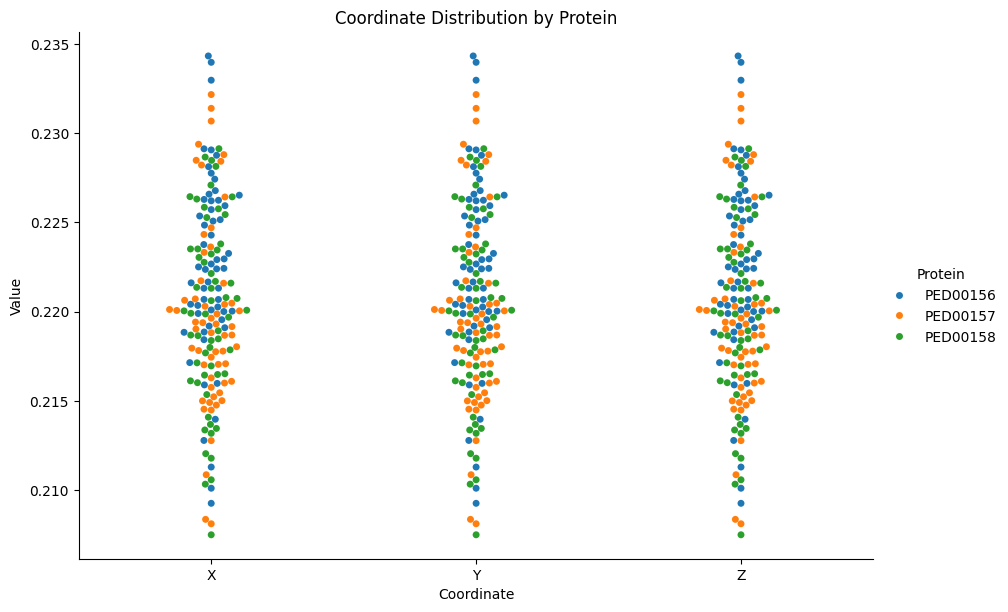

In [106]:
import seaborn as sns
import pandas as pd

def plot_coordinates(ss_order_parameter):
    # Creating a dataframe for the data
    data = pd.DataFrame(columns=['Protein', 'Coordinate', 'Value'])
    for protein, coordinates in ss_order_parameter.items():
        for coord_type in ['X', 'Y', 'Z']:
            temp_df = pd.DataFrame({'Protein': [protein]*len(coordinates),
                                    'Coordinate': [coord_type]*len(coordinates),
                                    'Value': coordinates})
            data = pd.concat([data, temp_df], ignore_index=True)

    # Plotting catplots
    plt.figure(figsize=(12, 8))
    sns.catplot(data=data, x='Coordinate', y='Value', hue='Protein', kind='swarm', height=6, aspect=1.5)
    plt.title('Coordinate Distribution by Protein')
    plt.xlabel('Coordinate')
    plt.ylabel('Value')
    plt.show()

    

# Call the function to plot catplots
plot_coordinates(ss_order_parameter)


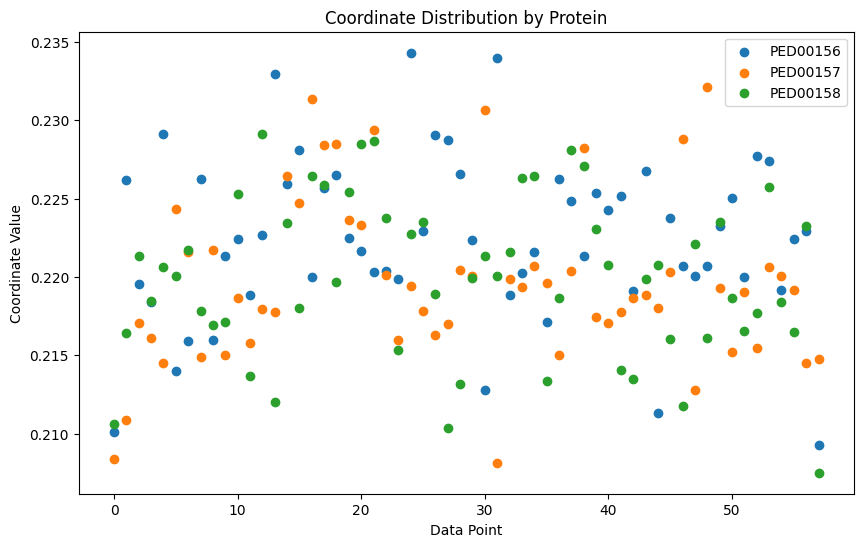

In [107]:
plt.figure(figsize=(10, 6))
for protein, coordinates in ss_order_parameter.items():
    plt.scatter(np.arange(len(coordinates)), coordinates, label=protein)
plt.title('Coordinate Distribution by Protein')
plt.xlabel('Data Point')
plt.ylabel('Coordinate Value')
plt.legend()
plt.show()

# φ ψ 
#### An other way to describe the conformation of a protein is through the angles φ (phi) and ψ (psi), which are associated with the rotation around the backbone bonds of the protein.The φ angle represents the rotation around the Cα-N bond, while the ψ angle represents the rotation around the Cα-C bond. These angles are essential for defining the backbone conformation of amino acids in a protein chain. They determine the secondary structure elements such as alpha-helices and beta-sheets.
In this analysis, we will extract the φ and ψ angles from PDB files representing different protein ensembles. We will conduct a statistical analysis to compare the distributions of φ and ψ angles among the three ensembles. This analysis will help us understand how the conformational properties of proteins vary across different ensembles, providing insights into their structural dynamics and functional implications.

In [108]:
# Codes of the ensembles we want to analyze,corresponding PDB files.
ens_codes = ['PED00156','PED00157','PED00158']
  
# Directory with the PDB files.
pdb_dp = "/Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3"

# Featurization options.
featurization = "phi_psi"  # choices: "ca_dist", phi_psi
featurization_params = {"ca_dist": {"seq_sep": 2, "normalize": True},
                        "phi_psi": {},
                        "a_angle": {}}


In [109]:
pipeline = EnsembleAnalysis(pdb_dp=pdb_dp,
                            ens_codes=ens_codes)


# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3/PED00156.dcd.
- Found 100 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3/PED00157.dcd.
- Found 100 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/N_termINAL_SH3/PED00158.dcd.
- Found 88 conformations.


In [110]:
pipeline.featurize(featurization=featurization,
                   featurization_params=featurization_params[featurization])

# Featurizing the PED00156 ensemble.
- Featurized ensemble shape: (100, 116)
# Featurizing the PED00157 ensemble.
- Featurized ensemble shape: (100, 116)
# Featurizing the PED00158 ensemble.
- Featurized ensemble shape: (88, 116)
Concatenated featurized ensemble shape: (288, 116)


In [111]:
concat_feature_phi_psi = pipeline.featurized_data
concat_feature_phi_psi

{'PED00156': array([[ 1.1577249 , -1.217782  , -1.2799942 , ...,  2.5013933 ,
         -0.20402087,  1.3094579 ],
        [ 1.2899319 , -2.3262308 , -1.172357  , ..., -1.4751793 ,
         -3.1351974 ,  1.2594489 ],
        [-1.1285951 , -1.2928191 , -1.3119535 , ...,  2.0671933 ,
          2.170035  ,  2.564002  ],
        ...,
        [-1.8687296 , -1.1213598 , -1.401682  , ...,  1.3203958 ,
          1.3073406 , -0.54799443],
        [-1.3948162 , -2.7970872 , -2.1043155 , ...,  2.1060603 ,
         -0.5932995 , -1.2692754 ],
        [-1.5568932 , -1.4384656 , -1.2367293 , ..., -0.58454627,
         -1.4442189 , -0.16403243]], dtype=float32),
 'PED00157': array([[-1.1845857 , -1.162165  , -1.3434937 , ...,  2.500024  ,
          0.6335332 ,  2.0394804 ],
        [ 3.0242426 , -1.2952259 , -1.1229025 , ...,  2.4418864 ,
         -2.897522  , -0.66710645],
        [-2.8507354 , -2.7416358 , -1.2957426 , ..., -0.58928984,
          1.8301954 ,  2.174993  ],
        ...,
        [-1.170

In [112]:
def split_phipsi_and_delate_lastphi_fristpsi_data(concat_feature_phi_psi):
    phi_psi_separated = {}
    for key, value in concat_feature_phi_psi.items():
        split_index = value.shape[1] // 2
        phi_array, psi_array = np.split(value, [split_index], axis=1)
        
        phi_psi_separated[key] = [phi_array, psi_array]
    return phi_psi_separated

phi_psi_separated = split_phipsi_and_delate_lastphi_fristpsi_data(concat_feature_phi_psi)

In [113]:
phi_psi_separated

{'PED00156': [array([[ 1.1577249, -1.217782 , -1.2799942, ..., -1.5391369, -1.5572883,
          -2.206052 ],
         [ 1.2899319, -2.3262308, -1.172357 , ...,  3.0916228, -1.389593 ,
          -2.3990347],
         [-1.1285951, -1.2928191, -1.3119535, ..., -0.8922659, -2.1221232,
          -2.5716746],
         ...,
         [-1.8687296, -1.1213598, -1.401682 , ..., -1.6481898, -1.4077625,
          -2.087956 ],
         [-1.3948162, -2.7970872, -2.1043155, ..., -1.421603 , -2.258184 ,
          -2.8266475],
         [-1.5568932, -1.4384656, -1.2367293, ..., -2.9039953, -1.7497973,
          -2.6116185]], dtype=float32),
  array([[ 2.5298812 ,  1.514883  , -0.3358479 , ...,  2.5013933 ,
          -0.20402087,  1.3094579 ],
         [ 2.1044478 ,  2.9167786 ,  2.229057  , ..., -1.4751793 ,
          -3.1351974 ,  1.2594489 ],
         [-3.0236785 , -0.3864216 ,  0.28906786, ...,  2.0671933 ,
           2.170035  ,  2.564002  ],
         ...,
         [-2.8689344 ,  3.1415167 ,  2.4526

This code creates a vertical boxplot where each box represents the distribution of Phi and Psi angles for a specific protein. The x-axis labels correspond to the protein names, and the y-axis represents the angles. 

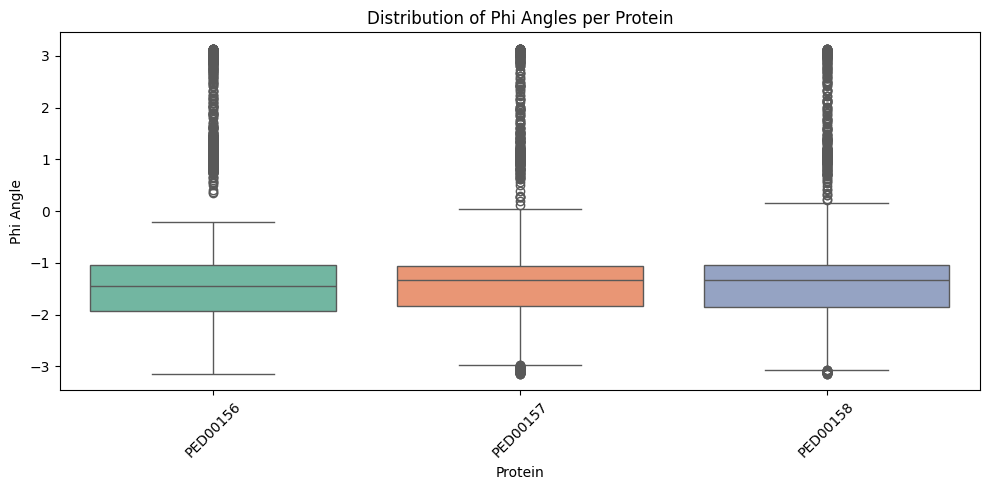

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=[phi_psi_separated[key][0].flatten() for key in phi_psi_separated.keys()], 
            orient='v', palette='Set2')
plt.title('Distribution of Phi Angles per Protein')
plt.xlabel('Protein')
plt.ylabel('Phi Angle')
plt.xticks(range(len(phi_psi_separated)), phi_psi_separated.keys())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


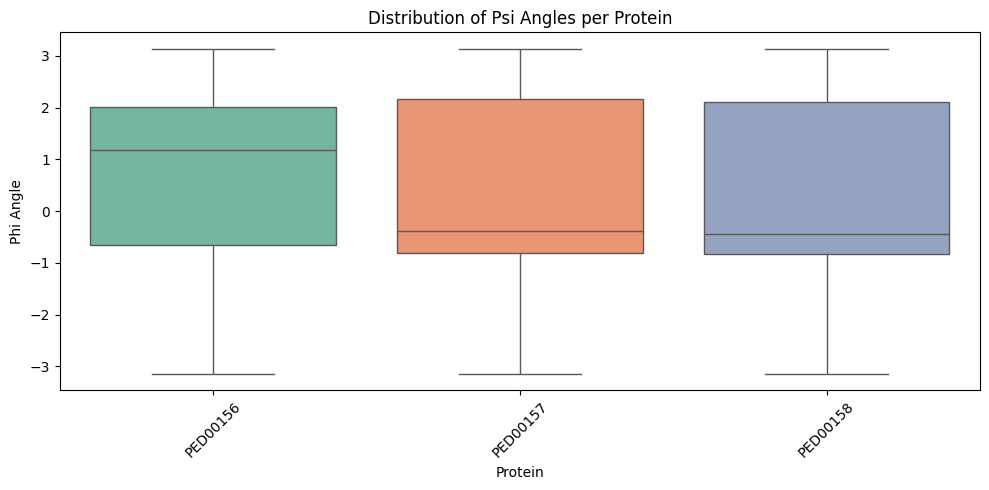

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=[phi_psi_separated[key][1].flatten() for key in phi_psi_separated.keys()], 
            orient='v', palette='Set2')
plt.title('Distribution of Psi Angles per Protein')
plt.xlabel('Protein')
plt.ylabel('Phi Angle')
plt.xticks(range(len(phi_psi_separated)), phi_psi_separated.keys())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
for protein, angles in phi_psi_separated.items():
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f'Heatmap per gli angoli Phi e Psi di {protein}')
    
    for idx, angle_data in enumerate(angles):
        ax = axes[idx]
        correlation_matrix = np.corrcoef(angle_data, rowvar=False)
        angle_type = 'Phi' if idx == 0 else 'Psi'
        sns.heatmap(correlation_matrix, cmap='coolwarm', ax=ax, square=True, annot=False)
        ax.set_title(f'Angoli {angle_type}')
        ax.set_xlabel('Conformazioni')
        ax.set_ylabel('Conformazioni')
    
    plt.tight_layout()
    plt.show()

This code generates two subplots for each protein, one for Phi angles and the other for Psi angles. Each subplot contains a heatmap illustrating the correlation between different conformations' angles. The color intensity indicates the strength of the correlation, with blue representing a negative correlation, and red representing a positive correlation.

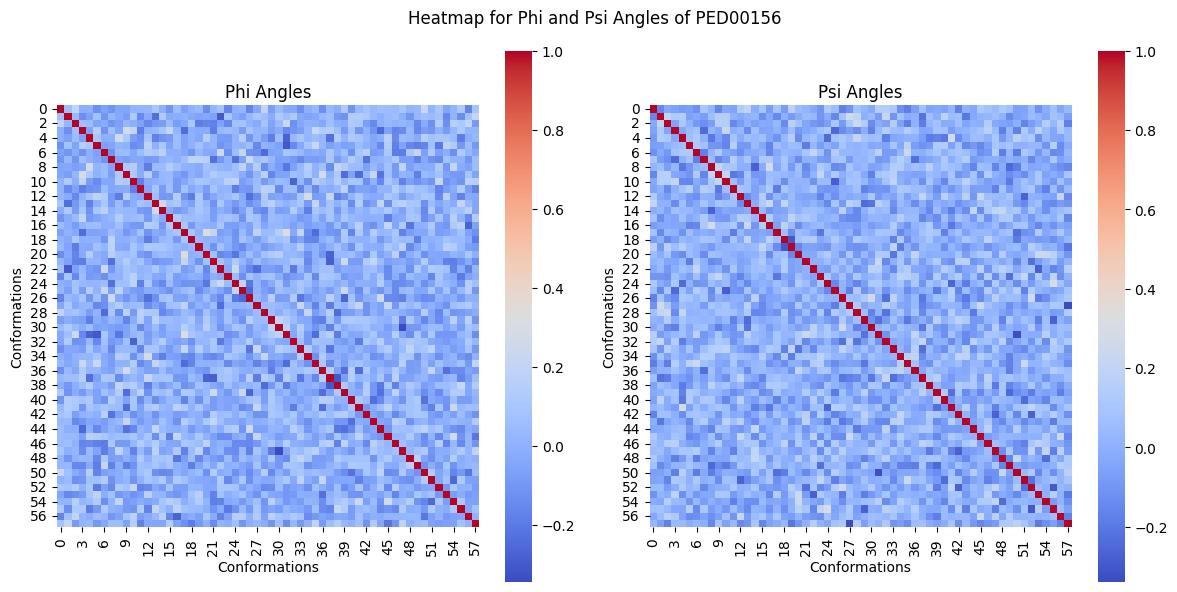

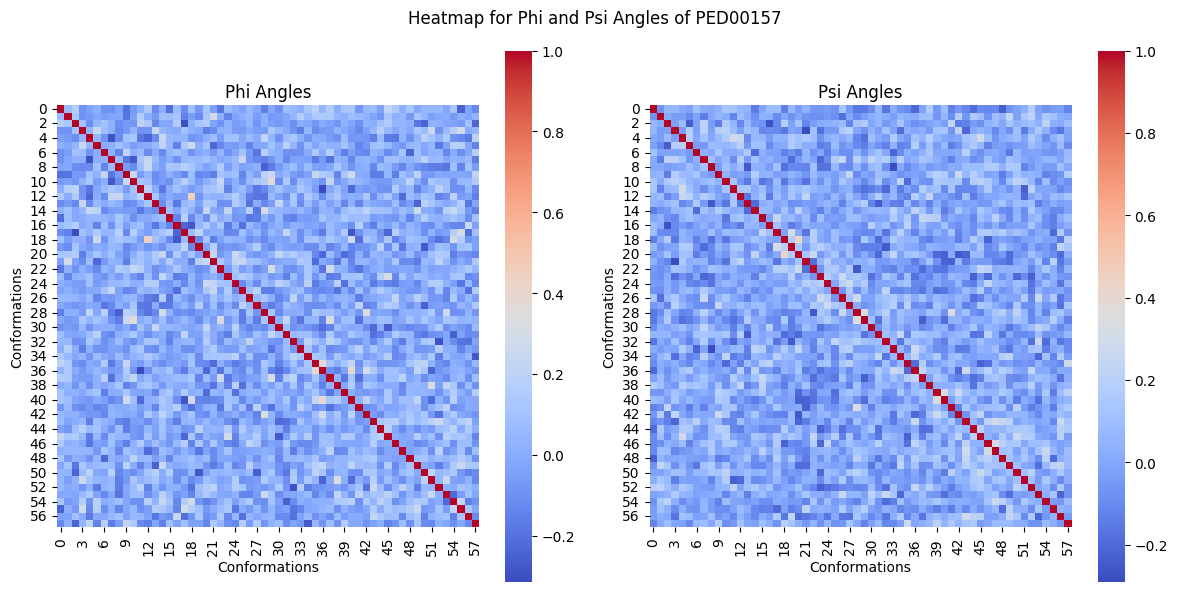

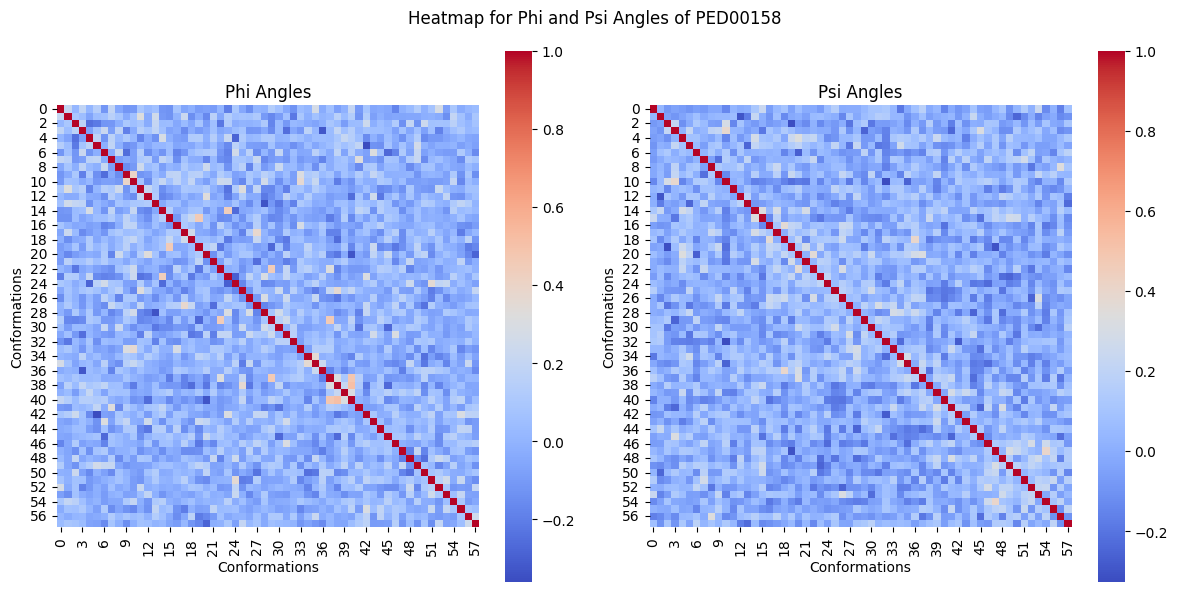

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

for protein, angles in phi_psi_separated.items():
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f'Heatmap for Phi and Psi Angles of {protein}')
    
    for idx, angle_data in enumerate(angles):
        ax = axes[idx]
        correlation_matrix = np.corrcoef(angle_data, rowvar=False)
        angle_type = 'Phi' if idx == 0 else 'Psi'
        sns.heatmap(correlation_matrix, cmap='coolwarm', ax=ax, square=True, annot=False)
        ax.set_title(f'{angle_type} Angles')
        ax.set_xlabel('Conformations')
        ax.set_ylabel('Conformations')
    
    plt.tight_layout()
    plt.show()


This code generates two subplots for each protein, one for Phi angles and the other for Psi angles. Each subplot contains a hexbin plot, where the density of points in specific regions indicates the frequency of occurrences of those combinations of Phi and Psi angles. The color intensity represents the density of points in that region

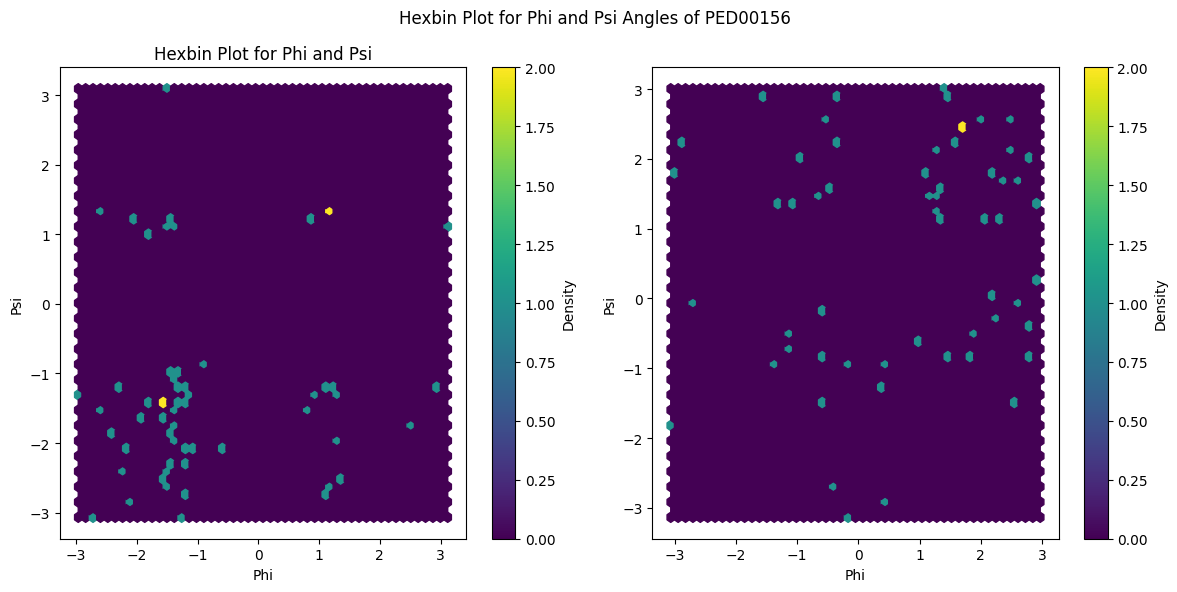

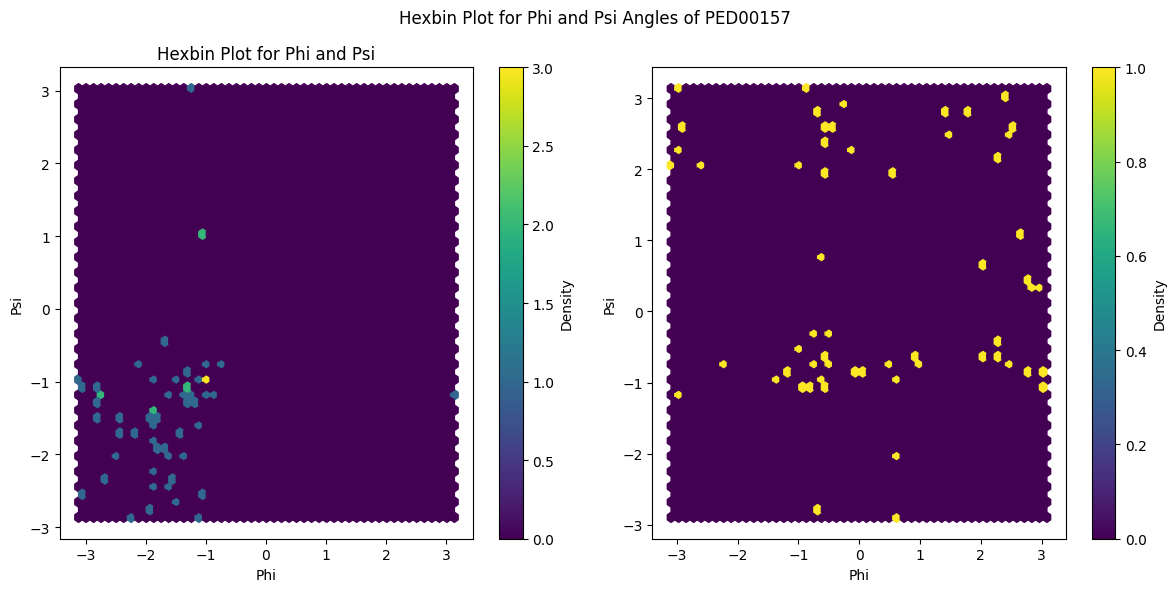

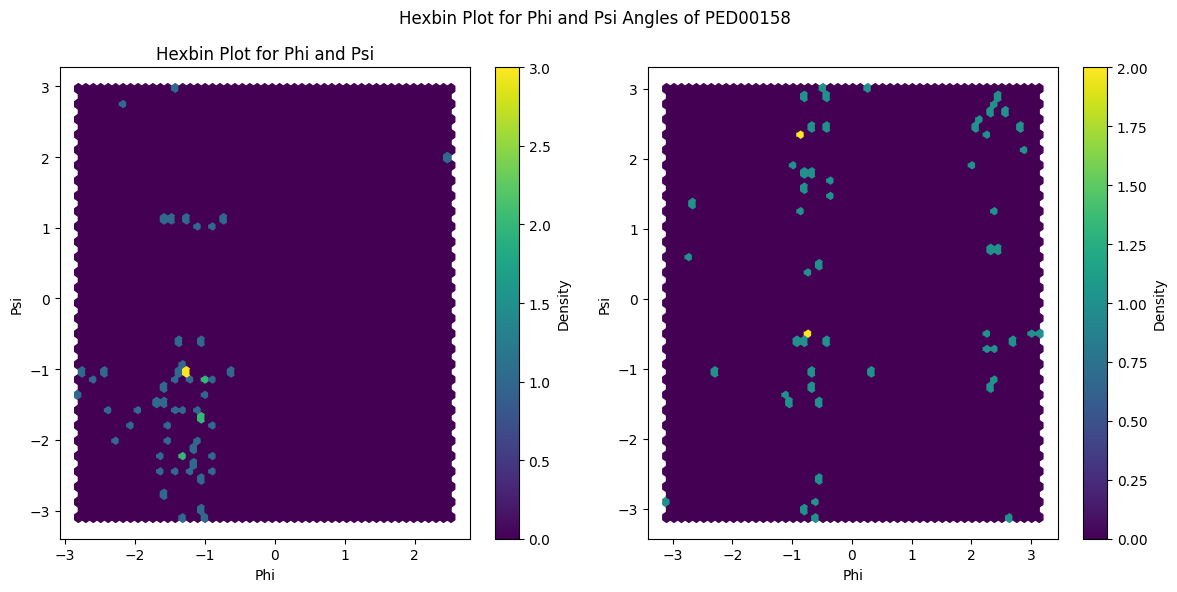

In [121]:
for protein, angles in phi_psi_separated.items():
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f'Hexbin Plot for Phi and Psi Angles of {protein}')
    
    for idx, angle_data in enumerate(angles):
        ax = axes[idx]
        phi = angle_data[0]
        psi = angle_data[1]
        hb = ax.hexbin(phi.ravel(), psi.ravel(), gridsize=50, cmap='viridis')
        ax.set_xlabel('Phi')
        ax.set_ylabel('Psi')
        ax.set_title('Hexbin Plot for Phi and Psi' if idx == 0 else '')
        fig.colorbar(hb, ax=ax, label='Density')
    
    plt.tight_layout()
    plt.show()


In [114]:
def stat_analysis(data):
    for protein, values in data.items():
        phi_mean = np.mean(values[0])
        psi_mean = np.mean(values[1])
        phi_std = np.std(values[0])
        psi_std = np.std(values[1])

        print(f'Protein: {protein}')
        print(f'Mean of phi: {phi_mean}, Standard Deviation of phi: {phi_std}')
        print(f'Mean of psi: {psi_mean}, Standard Deviation of psi: {psi_std}')
        print()

stat_analysis(phi_psi_separated)

Protein: PED00156
Mean of phi: -1.066834807395935, Standard Deviation of phi: 1.416733980178833
Mean of psi: 0.7014983296394348, Standard Deviation of psi: 1.5675504207611084

Protein: PED00157
Mean of phi: -1.3477545976638794, Standard Deviation of phi: 0.9527641534805298
Mean of psi: 0.3495955169200897, Standard Deviation of psi: 1.6504114866256714

Protein: PED00158
Mean of phi: -1.3403222560882568, Standard Deviation of phi: 1.0045223236083984
Mean of psi: 0.28460100293159485, Standard Deviation of psi: 1.6571989059448242



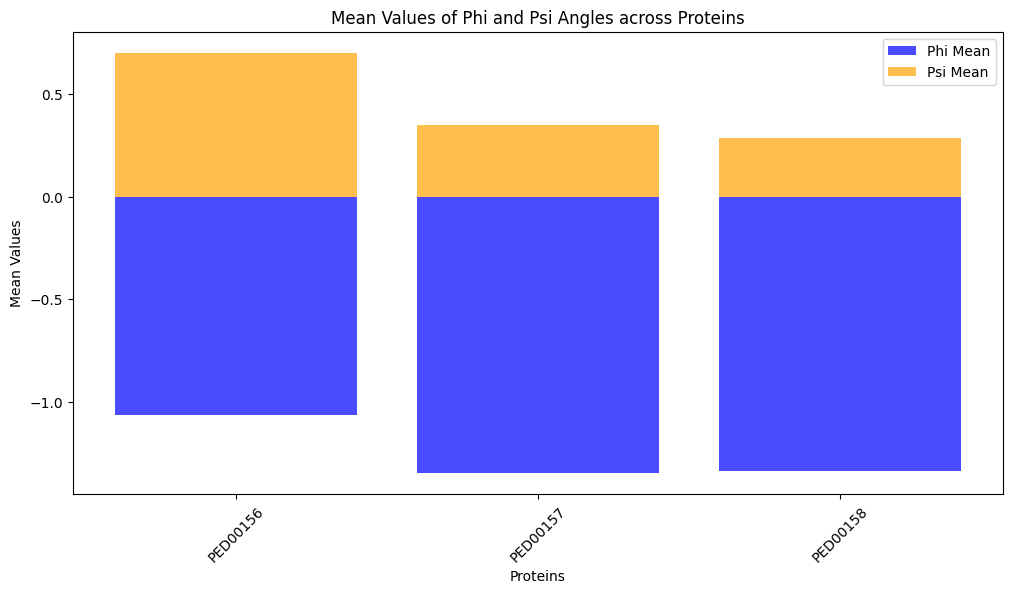

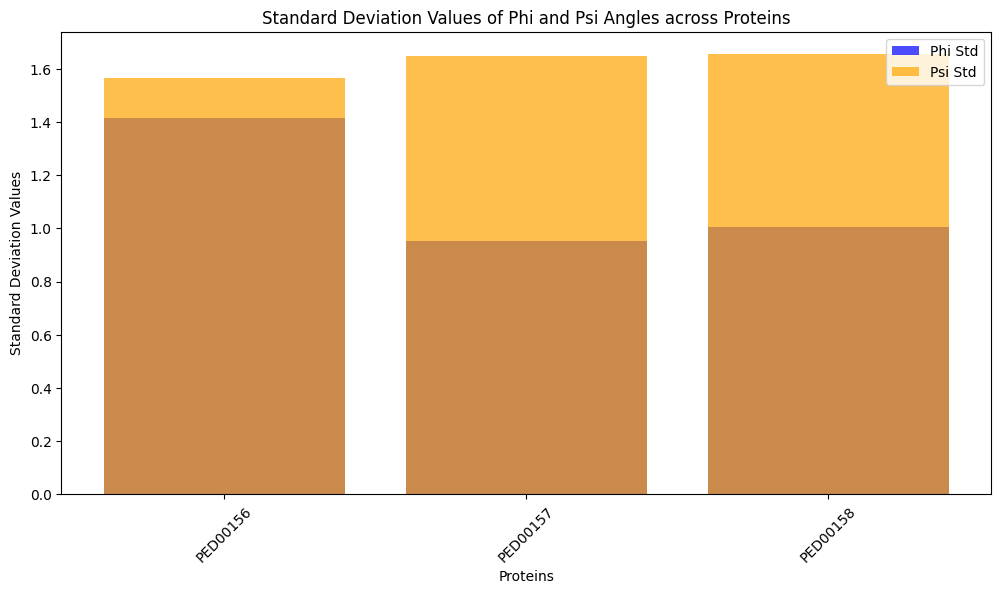

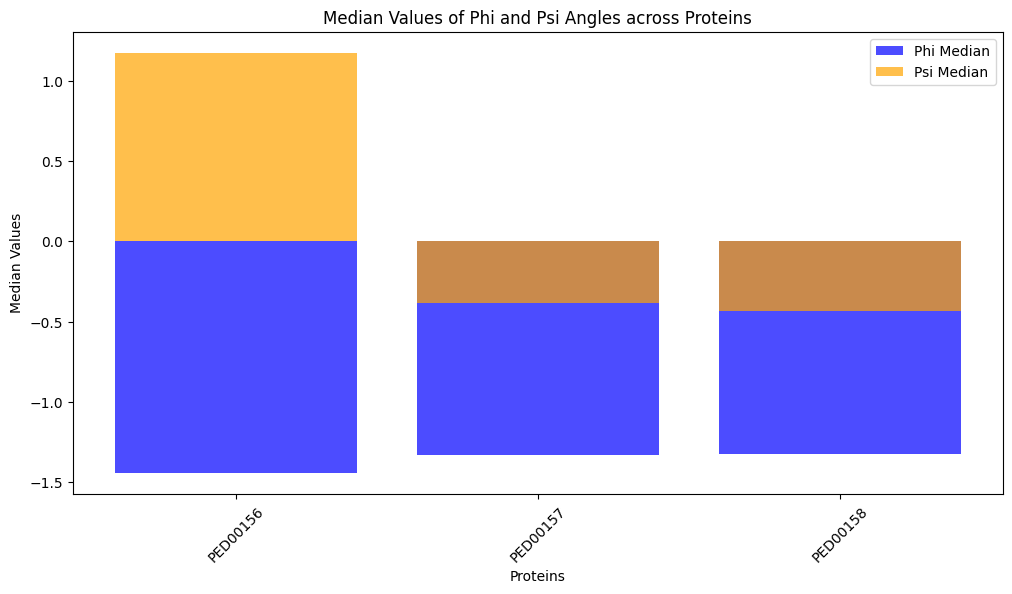

In [123]:
import numpy as np
import matplotlib.pyplot as plt

def stat_analysis(data):
    phi_means = []
    psi_means = []
    phi_stds = []
    psi_stds = []
    phi_medians = []
    psi_medians = []
    proteins = []

    for protein, values in data.items():
        phi_means.append(np.mean(values[0]))
        psi_means.append(np.mean(values[1]))
        phi_stds.append(np.std(values[0]))
        psi_stds.append(np.std(values[1]))
        phi_medians.append(np.median(values[0]))
        psi_medians.append(np.median(values[1]))
        proteins.append(protein)

    # Plot mean values
    plt.figure(figsize=(12, 6))
    plt.bar(proteins, phi_means, label='Phi Mean', color='blue', alpha=0.7)
    plt.bar(proteins, psi_means, label='Psi Mean', color='orange', alpha=0.7)
    plt.xlabel('Proteins')
    plt.ylabel('Mean Values')
    plt.title('Mean Values of Phi and Psi Angles across Proteins')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    # Plot standard deviation values
    plt.figure(figsize=(12, 6))
    plt.bar(proteins, phi_stds, label='Phi Std', color='blue', alpha=0.7)
    plt.bar(proteins, psi_stds, label='Psi Std', color='orange', alpha=0.7)
    plt.xlabel('Proteins')
    plt.ylabel('Standard Deviation Values')
    plt.title('Standard Deviation Values of Phi and Psi Angles across Proteins')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    # Plot median values
    plt.figure(figsize=(12, 6))
    plt.bar(proteins, phi_medians, label='Phi Median', color='blue', alpha=0.7)
    plt.bar(proteins, psi_medians, label='Psi Median', color='orange', alpha=0.7)
    plt.xlabel('Proteins')
    plt.ylabel('Median Values')
    plt.title('Median Values of Phi and Psi Angles across Proteins')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# Call the function with the phi_psi_separated data
stat_analysis(phi_psi_separated)

The code computes the t-statistic and p-value for the Phi and Psi angles of each pair, and prints the results for comparison.

In [124]:
from scipy.stats import ttest_ind

# Introduction:
# This code performs pairwise t-tests between the Phi and Psi angles of different proteins.
# It iterates over each pair of proteins, computes the t-statistic and p-value for both Phi and Psi angles,
# and prints the results.

protein_list = list(phi_psi_separated.keys())

# Perform pairwise t-tests for Phi and Psi angles between different proteins
for i in range(len(protein_list)):
    for j in range(i+1, len(protein_list)):
        protein1 = protein_list[i]
        protein2 = protein_list[j]
        
        # Extract Phi and Psi angles for each pair of proteins
        phi_angles1 = phi_psi_separated[protein1][0].flatten()
        phi_angles2 = phi_psi_separated[protein2][0].flatten()
        psi_angles1 = phi_psi_separated[protein1][1].flatten()
        psi_angles2 = phi_psi_separated[protein2][1].flatten()
        
        # Perform t-tests for Phi and Psi angles
        phi_tstat, phi_pvalue = ttest_ind(phi_angles1, phi_angles2)
        psi_tstat, psi_pvalue = ttest_ind(psi_angles1, psi_angles2)
        
        # Print the results of t-tests
        print(f"Comparison between {protein1} and {protein2} - Phi Angles: t-statistic = {phi_tstat}, p-value = {phi_pvalue}")
        print(f"Comparison between {protein1} and {protein2} - Psi Angles: t-statistic = {psi_tstat}, p-value = {psi_pvalue}")


Comparison between PED00156 and PED00157 - Phi Angles: t-statistic = 12.529895662054521, p-value = 8.732092645231028e-36
Comparison between PED00156 and PED00157 - Psi Angles: t-statistic = 11.773062751140516, p-value = 8.152167846366361e-32
Comparison between PED00156 and PED00158 - Phi Angles: t-statistic = 11.482069702068548, p-value = 2.425285776175721e-30
Comparison between PED00156 and PED00158 - Psi Angles: t-statistic = 13.489733721054467, p-value = 3.840711085954138e-41
Comparison between PED00157 and PED00158 - Phi Angles: t-statistic = -0.39620487050113823, p-value = 0.6919616525617738
Comparison between PED00157 and PED00158 - Psi Angles: t-statistic = 2.0477875388562903, p-value = 0.04060472994944333


## Shapiro-Wilk test
The Shapiro-Wilk test is a statistical tool used to determine if a given dataset follows a normal distribution. It calculates a test statistic and a p-value, where a high p-value indicates that the data is normally distributed, while a low p-value suggests non-normality. Researchers use this test to ensure that their data meets the normality assumption required by many statistical analyses. If the data fails the test, alternative methods may be needed to handle non-normality.

In [129]:
# Shapiro-Wilk test for normality
from scipy.stats import shapiro

phi_values = phi_psi_separated['PED00156'][0].ravel()  # for the protein 'PED00156'
# Perform the Shapiro-Wilk test to check the normality of the data
stat, p_value = shapiro(phi_values)
print(f'Shapiro-Wilk test for Phi angles: Statistic={stat}, p-value={p_value}')
if p_value > 0.05:
    print('The data follows a normal distribution')
else:
    print('The data does not follow a normal distribution')

psi_values = phi_psi_separated['PED00156'][1].ravel()  
# Perform the Shapiro-Wilk test to check the normality of the data
stat, p_value = shapiro(psi_values)
print(f'Shapiro-Wilk test for Psi angles: Statistic={stat}, p-value={p_value}')
if p_value > 0.05:
    print('The data follows a normal distribution')
else:
    print('The data does not follow a normal distribution')



Shapiro-Wilk test for Phi angles: Statistic=0.8493958187905357, p-value=2.850288453711227e-59
The data does not follow a normal distribution
Shapiro-Wilk test for Psi angles: Statistic=0.9407702031702188, p-value=3.236726128108216e-43
The data does not follow a normal distribution


/var/folders/_9/bjdfn2ys1lz1593fp2jk6n7c0000gn/T/ipykernel_1002/3314510510.py:6: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5800.
  stat, p_value = shapiro(phi_values)
/var/folders/_9/bjdfn2ys1lz1593fp2jk6n7c0000gn/T/ipykernel_1002/3314510510.py:15: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5800.
  stat, p_value = shapiro(psi_values)


In [130]:
phi_values = phi_psi_separated['PED00157'][0].ravel()  

stat, p_value = shapiro(phi_values)
print(f'Shapiro-Wilk test for Phi angles: Statistic={stat}, p-value={p_value}')
if p_value > 0.05:
    print('The data follows a normal distribution')
else:
    print('The data does not follow a normal distribution')

psi_values = phi_psi_separated['PED00157'][1].ravel()  
stat, p_value = shapiro(psi_values)
print(f'Shapiro-Wilk test for Psi angles: Statistic={stat}, p-value={p_value}')
if p_value > 0.05:
    print('The data follows a normal distribution')
else:
    print('The data does not follow a normal distribution')


Shapiro-Wilk test for Phi angles: Statistic=0.8126293643582645, p-value=2.0844801294531017e-63
The data does not follow a normal distribution
Shapiro-Wilk test for Psi angles: Statistic=0.8996276326197188, p-value=5.7171439513186464e-52
The data does not follow a normal distribution


/var/folders/_9/bjdfn2ys1lz1593fp2jk6n7c0000gn/T/ipykernel_1002/3436541134.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5800.
  stat, p_value = shapiro(phi_values)
/var/folders/_9/bjdfn2ys1lz1593fp2jk6n7c0000gn/T/ipykernel_1002/3436541134.py:11: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5800.
  stat, p_value = shapiro(psi_values)


In [131]:
phi_values = phi_psi_separated['PED00158'][0].ravel()  

stat, p_value = shapiro(phi_values)
print(f'Shapiro-Wilk test for Phi angles: Statistic={stat}, p-value={p_value}')
if p_value > 0.05:
    print('The data follows a normal distribution')
else:
    print('The data does not follow a normal distribution')

psi_values = phi_psi_separated['PED00158'][1].ravel()  
stat, p_value = shapiro(psi_values)
print(f'Shapiro-Wilk test for Psi angles: Statistic={stat}, p-value={p_value}')
if p_value > 0.05:
    print('The data follows a normal distribution')
else:
    print('The data does not follow a normal distribution')



Shapiro-Wilk test for Phi angles: Statistic=0.8273309440754227, p-value=2.95007781940623e-59
The data does not follow a normal distribution
Shapiro-Wilk test for Psi angles: Statistic=0.9057531744664012, p-value=1.390272516748902e-48
The data does not follow a normal distribution


/var/folders/_9/bjdfn2ys1lz1593fp2jk6n7c0000gn/T/ipykernel_1002/2924416576.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5104.
  stat, p_value = shapiro(phi_values)
/var/folders/_9/bjdfn2ys1lz1593fp2jk6n7c0000gn/T/ipykernel_1002/2924416576.py:11: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5104.
  stat, p_value = shapiro(psi_values)


### The Pearson correlation coefficient
The Pearson correlation coefficient, often denoted as r, is a statistical measure used to assess the strength and direction of the linear relationship between two continuous variables. It ranges from -1 to 1, where:

1 indicates a perfect positive linear relationship,
-1 indicates a perfect negative linear relationship, and
0 indicates no linear relationship.
The p-value associated with the correlation coefficient indicates the probability of observing the data if the true correlation coefficient were zero. Therefore, a low p-value suggests that the observed correlation is statistically significant.

The Pearson correlation test determines whether there is a significant linear relationship between two variables, helping to understand the association between different features in a dataset.







In [158]:
from scipy.stats import pearsonr

phi_values = phi_psi_separated['PED00156'][0].ravel()  # Example for the protein 'PED00156'
psi_values = phi_psi_separated['PED00156'][1].ravel()  # Example for the protein 'PED00156'

# Perform the Pearson correlation test between Phi and Psi angles
correlation_coefficient, p_value = pearsonr(phi_values, psi_values)
print(f'Pearson correlation coefficient between Phi and Psi: {correlation_coefficient}')
print(f'p-value: {p_value}')



Pearson correlation coefficient between Phi and Psi: -0.061255691794165096
p-value: 3.034463660553168e-06


In [134]:
phi_values = phi_psi_separated['PED00157'][0].ravel()  
psi_values = phi_psi_separated['PED00157'][1].ravel() 

# Perform the Pearson correlation test between Phi and Psi angles
correlation_coefficient, p_value = pearsonr(phi_values, psi_values)
print(f'Pearson correlation coefficient between Phi and Psi: {correlation_coefficient}')
print(f'p-value: {p_value}')

Pearson correlation coefficient between Phi and Psi: -0.0763574363756727
p-value: 5.79886531048857e-09


In [135]:
phi_values = phi_psi_separated['PED00158'][0].ravel()  
psi_values = phi_psi_separated['PED00158'][1].ravel() 

# Perform the Pearson correlation test between Phi and Psi angles
correlation_coefficient, p_value = pearsonr(phi_values, psi_values)
print(f'Pearson correlation coefficient between Phi and Psi: {correlation_coefficient}')
print(f'p-value: {p_value}')

Pearson correlation coefficient between Phi and Psi: -0.05682235659151982
p-value: 4.8694439535664286e-05


### The ANOVA test
The ANOVA test, short for Analysis of Variance, is a statistical method used to compare the means of three or more groups. It evaluates whether there are significant differences between the group means based on the variability within each group and the variability between the groups. ANOVA calculates an F-statistic and associated p-value. A low p-value (typically below 0.05) indicates that at least one group mean differs significantly from the others. ANOVA is commonly used when comparing means across different treatments or conditions, avoiding the need for multiple pairwise comparisons and reducing the likelihood of Type I errors.

In [138]:
from scipy.stats import f_oneway
phi_values_group1 = phi_psi_separated['PED00156'][0].ravel()  
phi_values_group2 = phi_psi_separated['PED00157'][0].ravel()
statistic, p_value = f_oneway(phi_values_group1, phi_values_group2)
print(f'ANOVA test to compare means of Phi angles between two groups: Statistic={statistic}, p-value={p_value}')
if p_value > 0.05:
    print('There is no significant difference between the means of the two groups')
else:
    print('There is a significant difference between the means of the two groups')

psi_values_group1 = phi_psi_separated['PED00156'][1].ravel()  
psi_values_group2 = phi_psi_separated['PED00157'][1].ravel()
statistic, p_value = f_oneway(phi_values_group1, phi_values_group2)
print(f'ANOVA test to compare means of Phi angles between two groups: Statistic={statistic}, p-value={p_value}')
if p_value > 0.05:
    print('There is no significant difference between the means of the two groups')
else:
    print('There is a significant difference between the means of the two groups')

ANOVA test to compare means of Phi angles between two groups: Statistic=156.99841375681297, p-value=8.731535833241539e-36
There is a significant difference between the means of the two groups
ANOVA test to compare means of Phi angles between two groups: Statistic=156.99841375681297, p-value=8.731535833241539e-36
There is a significant difference between the means of the two groups


In [139]:
from scipy.stats import f_oneway
phi_values_group1 = phi_psi_separated['PED00156'][0].ravel()  
phi_values_group2 = phi_psi_separated['PED00158'][0].ravel()
statistic, p_value = f_oneway(phi_values_group1, phi_values_group2)
print(f'ANOVA test to compare means of Phi angles between two groups: Statistic={statistic}, p-value={p_value}')
if p_value > 0.05:
    print('There is no significant difference between the means of the two groups')
else:
    print('There is a significant difference between the means of the two groups')

psi_values_group1 = phi_psi_separated['PED00156'][1].ravel()  
psi_values_group2 = phi_psi_separated['PED00158'][1].ravel()
statistic, p_value = f_oneway(phi_values_group1, phi_values_group2)
print(f'ANOVA test to compare means of Phi angles between two groups: Statistic={statistic}, p-value={p_value}')
if p_value > 0.05:
    print('There is no significant difference between the means of the two groups')
else:
    print('There is a significant difference between the means of the two groups')

ANOVA test to compare means of Phi angles between two groups: Statistic=131.83805946665385, p-value=2.4251230352049747e-30
There is a significant difference between the means of the two groups
ANOVA test to compare means of Phi angles between two groups: Statistic=131.83805946665385, p-value=2.4251230352049747e-30
There is a significant difference between the means of the two groups


In [140]:
from scipy.stats import f_oneway
phi_values_group1 = phi_psi_separated['PED00157'][0].ravel()  
phi_values_group2 = phi_psi_separated['PED00158'][0].ravel()
statistic, p_value = f_oneway(phi_values_group1, phi_values_group2)
print(f'ANOVA test to compare means of Phi angles between two groups: Statistic={statistic}, p-value={p_value}')
if p_value > 0.05:
    print('There is no significant difference between the means of the two groups')
else:
    print('There is a significant difference between the means of the two groups')

psi_values_group1 = phi_psi_separated['PED00157'][1].ravel()  
psi_values_group2 = phi_psi_separated['PED00158'][1].ravel()
statistic, p_value = f_oneway(phi_values_group1, phi_values_group2)
print(f'ANOVA test to compare means of Phi angles between two groups: Statistic={statistic}, p-value={p_value}')
if p_value > 0.05:
    print('There is no significant difference between the means of the two groups')
else:
    print('There is a significant difference between the means of the two groups')

ANOVA test to compare means of Phi angles between two groups: Statistic=0.15697721760381744, p-value=0.6919626595880606
There is no significant difference between the means of the two groups
ANOVA test to compare means of Phi angles between two groups: Statistic=0.15697721760381744, p-value=0.6919626595880606
There is no significant difference between the means of the two groups


### K-Means
K-Means clustering is an unsupervised machine learning algorithm used for partitioning data into distinct groups, or clusters, based on similarity. In this context, we apply K-Means clustering to protein conformations represented by Phi and Psi angles. The algorithm aims to group similar protein conformations together, making it useful for tasks such as structural analysis or classification. By specifying the desired number of clusters, K-Means partitions the data into clusters and assigns cluster labels to each data point. The resulting clusters can be visualized to understand patterns and relationships within the data.

Cluster labels:
[0 1 1 ... 1 1 1]


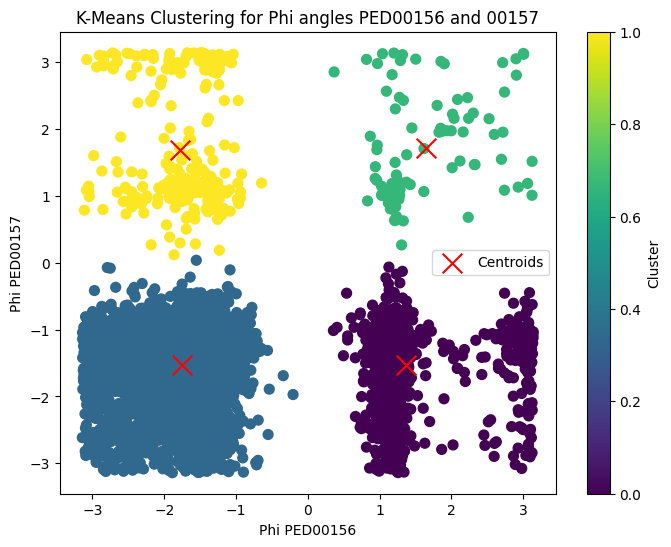

In [159]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
data_matrix = np.vstack((phi_psi_separated['PED00156'][0].ravel(), phi_psi_separated['PED00157'][0].ravel())).T

# Perform K-Means clustering to group protein conformations into similar clusters
kmeans = KMeans(n_clusters=4, random_state=0)  # Specify the desired number of clusters
cluster_labels = kmeans.fit_predict(data_matrix)

# Print cluster labels for each protein conformation
print("Cluster labels:")
print(cluster_labels)

# Visualize the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(data_matrix[:, 0], data_matrix[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Centroids')
plt.xlabel('Phi PED00156')
plt.ylabel('Phi PED00157')
plt.title('K-Means Clustering for Phi angles PED00156 and 00157')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()



Etichette dei cluster:
[2 2 1 ... 2 2 2]


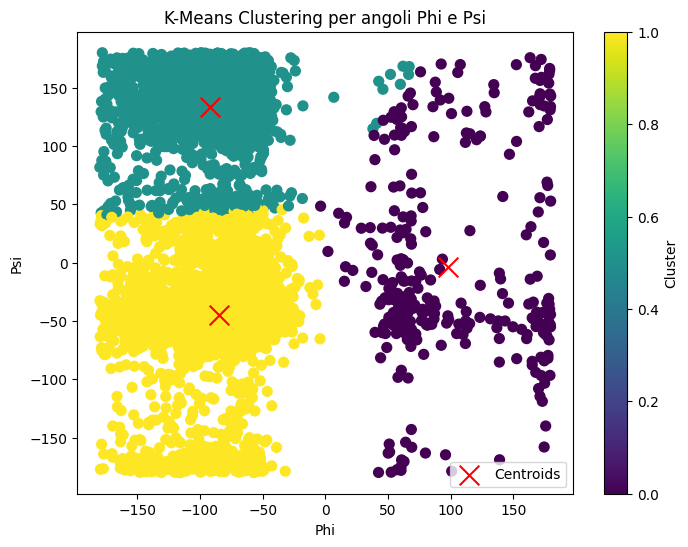

In [61]:
#KMEANSClustering  ????????
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Supponiamo di avere una matrice di dati contenente gli angoli Phi e Psi per le proteine
data_matrix = np.vstack((phi_psi_separated['PED00157'][0].ravel(), phi_psi_separated['PED00157'][1].ravel())).T

# Esegui il clustering K-Means per raggruppare le conformazioni delle proteine in gruppi simili
kmeans = KMeans(n_clusters=3, random_state=0)  # Specifica il numero di cluster desiderato
cluster_labels = kmeans.fit_predict(data_matrix)

# Stampa le etichette dei cluster per ogni conformazione delle proteine
print("Etichette dei cluster:")
print(cluster_labels)

# Visualizza i risultati del clustering
plt.figure(figsize=(8, 6))
plt.scatter(data_matrix[:, 0], data_matrix[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Centroids')
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.title('K-Means Clustering per angoli Phi e Psi')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

Etichette dei cluster:
[0 2 2 ... 2 2 1]


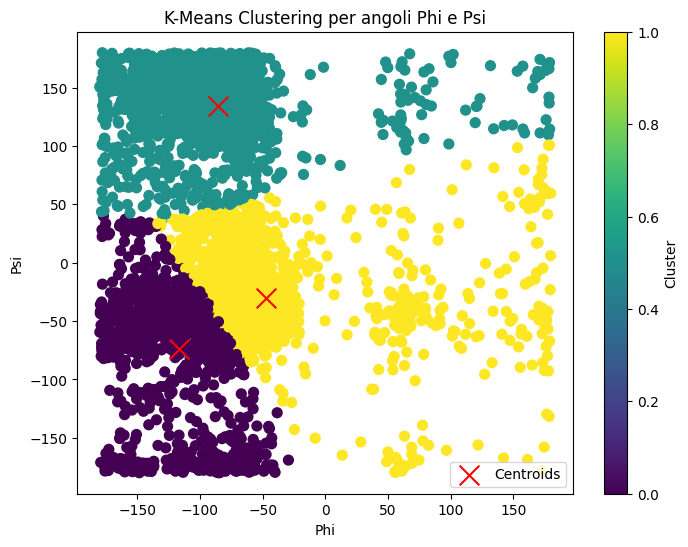

In [62]:
#KMEANSClustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Supponiamo di avere una matrice di dati contenente gli angoli Phi e Psi per le proteine
data_matrix = np.vstack((phi_psi_separated['PED00158'][0].ravel(), phi_psi_separated['PED00158'][1].ravel())).T

# Esegui il clustering K-Means per raggruppare le conformazioni delle proteine in gruppi simili
kmeans = KMeans(n_clusters=3, random_state=0)  # Specifica il numero di cluster desiderato
cluster_labels = kmeans.fit_predict(data_matrix)

# Stampa le etichette dei cluster per ogni conformazione delle proteine
print("Etichette dei cluster:")
print(cluster_labels)

# Visualizza i risultati del clustering
plt.figure(figsize=(8, 6))
plt.scatter(data_matrix[:, 0], data_matrix[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Centroids')
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.title('K-Means Clustering per angoli Phi e Psi')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

### Student's t-test 
 Student's t-test is used to compare the means of Phi angles between two groups of proteins. The test assesses whether the difference in means between the two groups is statistically significant. If the p-value (probability value) obtained from the t-test is less than 0.05, it suggests that there is a significant difference between the means of the two groups, indicating that the Phi angles might play a role in distinguishing the groups. Otherwise, if the p-value is greater than 0.05, it indicates that there is no significant difference between the means of the two groups.

In [148]:
from scipy.stats import ttest_ind
phi_values_group1 = phi_psi_separated['PED00156'][0].ravel() 
phi_values_group2 = phi_psi_separated['PED00157'][0].ravel()  
t_statistic, p_value = ttest_ind(phi_values_group1, phi_values_group2)
print(f"Student's t-test to compare the means of Phi angles between two groups:\n t-statistic={t_statistic}, p-value={p_value}")
if p_value > 0.05:
    print('There is no significant difference between the means of the two groups')
else:
    print('There is a significant difference between the means of the two groups')

psi_values_group1 = phi_psi_separated['PED00156'][1].ravel()  
psi_values_group2 = phi_psi_separated['PED00157'][1].ravel()  
t_statistic, p_value = ttest_ind(psi_values_group1, psi_values_group2)
print(f"Student's t-test to compare the means of Psi angles between two groups:\n t-statistic={t_statistic}, p-value={p_value}")
if p_value > 0.05:
    print('There is no significant difference between the means of the two groups')
else:
    print('There is a significant difference between the means of the two groups')


Student's t-test to compare the means of Phi angles between two groups:
 t-statistic=12.529895662054521, p-value=8.732092645231028e-36
There is a significant difference between the means of the two groups
Student's t-test to compare the means of Psi angles between two groups:
 t-statistic=11.773062751140516, p-value=8.152167846366361e-32
There is a significant difference between the means of the two groups


In [149]:
phi_values_group1 = phi_psi_separated['PED00156'][0].ravel() 
phi_values_group2 = phi_psi_separated['PED00158'][0].ravel()  
t_statistic, p_value = ttest_ind(phi_values_group1, phi_values_group2)
print(f"Student's t-test to compare the means of Phi angles between two groups:\n t-statistic={t_statistic}, p-value={p_value}")
if p_value > 0.05:
    print('There is no significant difference between the means of the two groups')
else:
    print('There is a significant difference between the means of the two groups')


psi_values_group1 = phi_psi_separated['PED00156'][1].ravel()  
psi_values_group2 = phi_psi_separated['PED00158'][1].ravel()  
t_statistic, p_value = ttest_ind(psi_values_group1, psi_values_group2)
print(f"Student's t-test to compare the means of Psi angles between two groups:\n t-statistic={t_statistic}, p-value={p_value}")
if p_value > 0.05:
    print('There is no significant difference between the means of the two groups')
else:
    print('There is a significant difference between the means of the two groups')

Student's t-test to compare the means of Phi angles between two groups:
 t-statistic=11.482069702068548, p-value=2.425285776175721e-30
There is a significant difference between the means of the two groups
Student's t-test to compare the means of Psi angles between two groups:
 t-statistic=13.489733721054467, p-value=3.840711085954138e-41
There is a significant difference between the means of the two groups


In [150]:
phi_values_group1 = phi_psi_separated['PED00157'][0].ravel()  
phi_values_group2 = phi_psi_separated['PED00158'][0].ravel()  
t_statistic, p_value = ttest_ind(phi_values_group1, phi_values_group2)
print(f"Student's t-test to compare the means of Phi angles between two groups:\n t-statistic={t_statistic}, p-value={p_value}")
if p_value > 0.05:
    print('There is no significant difference between the means of the two groups')
else:
    print('There is a significant difference between the means of the two groups')


psi_values_group1 = phi_psi_separated['PED00157'][1].ravel()  
psi_values_group2 = phi_psi_separated['PED00158'][1].ravel()  
t_statistic, p_value = ttest_ind(psi_values_group1, psi_values_group2)
print(f"Student's t-test to compare the means of Psi angles between two groups:\n t-statistic={t_statistic}, p-value={p_value}")
if p_value > 0.05:
    print('There is no significant difference between the means of the two groups')
else:
    print('There is a significant difference between the means of the two groups')

Student's t-test to compare the means of Phi angles between two groups:
 t-statistic=-0.39620487050113823, p-value=0.6919616525617738
There is no significant difference between the means of the two groups
Student's t-test to compare the means of Psi angles between two groups:
 t-statistic=2.0477875388562903, p-value=0.04060472994944333
There is a significant difference between the means of the two groups


In [ ]:
alph carbon  - distance - visualize concact map 